In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
from naiveBayesDensity import *
# from IPython.core.pylabtools import figsize
%matplotlib inline
warnings.filterwarnings('ignore') 
from naiveBayesBasic import Classifier as basicClassifier

figure out a better way to make this work. 

In [2]:
def get_tnum_info(l):
    tnum = []
    desc1 = []
    desc2 = []
    desc3 = []
    desc33 = []
    desc4 = []
    desc5 = []
    desc6 = []
    desc7 = []
    desc8 = []
    desc9 = []
    desc10 = []
    desc11 = []
    desc12 = []
    desc13 = []
    desc14 = []
    eng1 = []
    eng2 = []
    eng3 = []
    eng4 = []
    eng5 = []
    eng6 = []
    for itm in l:
        print(itm)
        try:
            response = requests.get(
                "https://registry.faa.gov/aircraftinquiry/NNum_Results.aspx?NNumbertxt="
                + itm)
            bsObj = BeautifulSoup(response.text, "lxml")
            pg = bsObj.findAll('div', {'id': 'content'})
            air_desc_table_bs4 = pg[0].findAll('table', {'class': 'Boxed'})
            
            snum = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_lbSerialNo"})[0].getText()
            status = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_lbStatus"})[0].getText()
            mfr_name = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_lbMfrName"})[0].getText()
            cert_date = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_lbCertDate"})[0].getText()
            model = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_Label7"})[0].getText()
            exp_date = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_Label9"})[0].getText()
            type_aircraft = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_Label11"})[0].getText()
            type_eng = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_lbTypeEng"})[0].getText()
            pend_num_change = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_Label13"})[0].getText()
            dealer = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_lbDealer"})[0].getText()
            date_change_auth = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_Label15"})[0].getText()
            mode_s_8 = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_lbModeSCode"})[0].getText()
            mfr_year = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_Label17"})[0].getText()
            reg_type = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_lbTypeReg"})[0].getText()
            frac_own = air_desc_table_bs4[0].findAll(
                'span', {'id': "content_lbFacOwner"})[0].getText()

            desc1.append(snum)
            desc2.append(status)
            desc3.append(cert_date)
            desc33.append(mfr_name)
            desc4.append(model)
            desc5.append(exp_date)
            desc6.append(type_aircraft)
            desc7.append(type_eng)
            desc8.append(pend_num_change)
            desc9.append(dealer)
            desc10.append(date_change_auth)
            desc11.append(mode_s_8)
            desc12.append(mfr_year)
            desc13.append(reg_type)
            desc14.append(frac_own)

            eng_desc_table_bs4 = pg[0].findAll('table', {'class': 'Boxed'})

            eng_mfg = eng_desc_table_bs4[2].findAll(
                'span', {'id': "content_lbEngMfr"})[0].getText()
            eng_class = eng_desc_table_bs4[2].findAll(
                'span', {'id': "content_lbClassification"})[0].getText()
            eng_mod = eng_desc_table_bs4[2].findAll(
                'span', {'id': "content_lbEngModel"})[0].getText()
            eng_cat = eng_desc_table_bs4[2].findAll(
                'span', {'id': "content_lbCategory1"})[0].getText()
            aw_date = eng_desc_table_bs4[2].findAll(
                'span', {'id': "content_lbAWDate"})[0].getText()
            ex_code = eng_desc_table_bs4[2].findAll(
                'span', {'id': "content_Label26"})[0].getText()

            eng1.append(eng_mfg)
            eng2.append(eng_class)
            eng3.append(eng_mod)
            eng4.append(eng_cat)
            eng5.append(aw_date)
            eng6.append(ex_code)
            tnum.append(itm)
            print('next')
        except:
            print('not valid')
#             tnum = tnum.remove(itm)
            
    print('done with tailnums')
#     print(len(tnum), len(desc1))
#     print(desc1)
    planeDict = {
        "Tail Number": tnum,
        "Serial Number": desc1,
        "Manufacturer name": desc33,
        "Model": desc4,
        "Type Aircraft": desc6,
        "Pending Number Change": desc8,
        "Date Change Authorized": desc10,
        "MFR Year": desc12,
        "Type Registration": desc13,
        "Status": desc2,
        "Certificate Issue Date": desc3,
        "Expiration Date": desc5,
        "Type Engine": desc7,
        "Dealer": desc9,
        "Mode S Code (base 8)": desc11,
        "Fractional Owner": desc14,
        "Engine Manufacturer": eng1,
        "Engine Model": eng3,
        "A/W Date": eng5,
        "Airworthiness Classification": eng2,
        "Airworthiness Category": eng4,
        "Exception Code": eng6
    }
    return (pd.DataFrame(planeDict))

In [3]:
tnum_list = ['7819A', 'N001AA', 'N002AA', 'N003AA', 'N004AA', 'N005AA', 'N006AA', 'N007AA', 'N008AA', 'N009AA', 'N010AA', 'N011AA', 'N012AA', 'N013AA', 'N014AA', 'N015AA', 'N016AA', 'N017AA', 'N018AA', 'N019AA', 'N020AA', 'N021AA', 'N022AA', 'N023AA', 'N024AA', 'N025AA', 'N026AA', 'N027AA', 'N028AA', 'N029AA', 'N030AA', 'N031AA', 'N032AA', 'N050AA', 'N051AA', 'N052AA', 'N054AA', 'N055AA', 'N056AA', 'N057AA', 'N058AA', 'N059AA', 'N060AA', 'N061AA', 'N062AA', 'N063AA', 'N064AA', 'N066AA', 'N068AA', 'N069AA', 'N071AA', 'N072AA', 'N073AA', 'N074AA', 'N075AA', 'N076AA', 'N077AA', 'N078AA', 'N079AA', 'N080AA', 'N081AA', 'N082AA', 'N083AA', 'N084AA', 'N0EGMQ', 'N101DA', 'N101UW', 'N102', 'N102DA', 'N102UW', 'N103', 'N10323', 'N103DA', 'N103SY', 'N103US', 'N103UW', 'N104', 'N104DA', 'N104UA', 'N104UW', 'N105', 'N10575', 'N105DA', 'N105SY', 'N105UA', 'N105UW', 'N106DA', 'N106SY', 'N106UA', 'N106UW', 'N107DL', 'N107SY', 'N107UA', 'N107US', 'N107UW', 'N10801', 'N10834', 'N108DL', 'N108SY', 'N108UA', 'N108UW', 'N109DL', 'N109SY', 'N109UA', 'N109UW', 'N110DL', 'N110SY', 'N110UW', 'N11107', 'N11109', 'N11127', 'N11140', 'N11150', 'N11164', 'N11165', 'N11176', 'N11181', 'N11184', 'N11187', 'N11189', 'N11191', 'N11192', 'N11193', 'N11194', 'N11199', 'N111DN', 'N111US', 'N111UW', 'N11206', 'N112US', 'N112UW', 'N113DA', 'N113SY', 'N113UW', 'N114SY', 'N114UW', 'N11526', 'N11535', 'N11536', 'N11539', 'N11544', 'N11547', 'N11548', 'N11551', 'N11565', 'N115UW', 'N11612', 'N11641', 'N11651', 'N11656', 'N116DL', 'N116SY', 'N116UA', 'N116UW', 'N117DL', 'N117SY', 'N117UA', 'N117UW', 'N118DL', 'N118SY', 'N118UA', 'N118US', 'N118UW', 'N119DL', 'N119SY', 'N119UA', 'N119US', 'N119UW', 'N1200K', 'N1201P', 'N120DL', 'N120SY', 'N120UA', 'N120UW', 'N12109', 'N12114', 'N12116', 'N12125', 'N12135', 'N12136', 'N12142', 'N12145', 'N12157', 'N12160', 'N12163', 'N12166', 'N12167', 'N12172', 'N12175', 'N12195', 'N121DE', 'N121SY', 'N121UA', 'N121UW', 'N12201', 'N12216', 'N12218', 'N12221', 'N12225', 'N12238', 'N122DL', 'N122SY', 'N122UA', 'N122US', 'N122UW', 'N12313', 'N12318', 'N12319', 'N12322', 'N12327', 'N12349', 'N123DN', 'N123UW', 'N124DE', 'N124SY', 'N124US', 'N124UW', 'N12528', 'N12530', 'N12540', 'N12552', 'N12563', 'N12564', 'N12567', 'N12569', 'N125DL', 'N125SY', 'N125UW', 'N126DL', 'N126UW', 'N12754', 'N127DL', 'N127SY', 'N127UA', 'N127UW', 'N12811', 'N128DL', 'N128SY', 'N128UA', 'N128UW', 'N129', 'N12900', 'N12921', 'N12922', 'N12924', 'N12996', 'N129DL', 'N130', 'N1308T', 'N1309T', 'N130DL', 'N130SY', 'N13110', 'N13113', 'N13118', 'N13124', 'N13132', 'N13133', 'N13138', 'N13161', 'N131DN', 'N131EV', 'N131SY', 'N13202', 'N13227', 'N13248', 'N132DN', 'N132EV', 'N132SY', 'N1332U', 'N1334U', 'N133DN', 'N133EV', 'N133JC', 'N133SY', 'N134DL', 'N134EV', 'N134SY', 'N13538', 'N13550', 'N13553', 'N13566', 'N135DL', 'N135EV', 'N135SY', 'N13624', 'N13665', 'N136DL', 'N136EV', 'N136SY', 'N13716', 'N13718', 'N13720', 'N13750', 'N137DL', 'N137EV', 'N138DL', 'N138EV', 'N138SY', 'N13903', 'N13908', 'N13913', 'N13914', 'N13954', 'N13975', 'N13978', 'N13979', 'N13988', 'N13989', 'N13992', 'N13994', 'N13995', 'N13997', 'N139DL', 'N139SY', 'N1402A', 'N140LL', 'N140SY', 'N14102', 'N14105', 'N14106', 'N14107', 'N14115', 'N14118', 'N14120', 'N14121', 'N14143', 'N14148', 'N14158', 'N14162', 'N14168', 'N14171', 'N14173', 'N14174', 'N14177', 'N14179', 'N14180', 'N14186', 'N14188', 'N14198', 'N141SY', 'N14203', 'N14204', 'N14214', 'N14219', 'N14228', 'N14230', 'N14231', 'N14235', 'N14237', 'N14242', 'N14250', 'N142SY', 'N14307', 'N14308', 'N14320', 'N14324', 'N14325', 'N14334', 'N14335', 'N14336', 'N14337', 'N14341', 'N14342', 'N14346', 'N14347', 'N14358', 'N14383', 'N14384', 'N143DA', 'N143SY', 'N144DA', 'N144SY', 'N14542', 'N14543', 'N14558', 'N14562', 'N14568', 'N14570', 'N14573', 'N145SY', 'N14601', 'N14604', 'N14605', 'N14609', 'N14613', 'N14628', 'N14629', 'N14639', 'N14645', 'N14652', 'N14653', 'N14654', 'N14655', 'N14660', 'N14662', 'N14664', 'N14667', 'N14668', 'N146PQ', 'N146SY', 'N14704', 'N14731', 'N14735', 'N147PQ', 'N14816', 'N14831', 'N14839', 'N14840', 'N14871', 'N14879', 'N148SY', 'N14902', 'N14904', 'N14905', 'N14907', 'N14916', 'N14920', 'N14923', 'N14977', 'N14991', 'N14993', 'N14998', 'N149SY', 'N1501P', 'N150AW', 'N150SY', 'N150UW', 'N151AW', 'N151SY', 'N151UW', 'N152DL', 'N152UW', 'N153DL', 'N153PQ', 'N153UW', 'N154AW', 'N154DL', 'N154UW', 'N15527', 'N15555', 'N15572', 'N15574', 'N155AW', 'N155DL', 'N155UW', 'N15659', 'N156AW', 'N156DL', 'N156UW', 'N15710', 'N15712', 'N15751', 'N157AW', 'N157UW', 'N15820', 'N15841', 'N158AW', 'N15910', 'N15912', 'N15980', 'N15983', 'N15985', 'N15986', 'N1602', 'N1603', 'N1604R', 'N1605', 'N16065', 'N1607B', 'N1608', 'N1609', 'N160AW', 'N1610D', 'N1611B', 'N1612T', 'N1613B', 'N16147', 'N16149', 'N16170', 'N16178', 'N16183', 'N161PQ', 'N161UW', 'N16217', 'N16234', 'N162PQ', 'N162UW', 'N16301', 'N16310', 'N16339', 'N163US', 'N163UW', 'N164AW', 'N164UW', 'N16541', 'N16546', 'N16559', 'N16561', 'N16571', 'N165US', 'N165UW', 'N16607', 'N16617', 'N16618', 'N16632', 'N16642', 'N16646', 'N16647', 'N16648', 'N16649', 'N16650', 'N166AW', 'N166PQ', 'N166UW', 'N16701', 'N16703', 'N16709', 'N16713', 'N16732', 'N167US', 'N167UW', 'N16806', 'N16883', 'N168AW', 'N168UW', 'N16911', 'N16918', 'N16919', 'N16976', 'N16981', 'N16987', 'N16999', 'N169DZ', 'N169UW', 'N170PQ', 'N170SY', 'N170US', 'N170UW', 'N17104', 'N17105', 'N17108', 'N17115', 'N17122', 'N17126', 'N17128', 'N17133', 'N17138', 'N17139', 'N17146', 'N17159', 'N17169', 'N17185', 'N17196', 'N171DN', 'N171DZ', 'N171SY', 'N171UA', 'N171US', 'N171UW', 'N17229', 'N17233', 'N17244', 'N17245', 'N172DN', 'N172DZ', 'N172UA', 'N172US', 'N172UW', 'N17306', 'N17309', 'N17316', 'N17317', 'N17321', 'N17326', 'N17328', 'N17329', 'N17344', 'N17345', 'N17356', 'N173AW', 'N173DN', 'N173DZ', 'N173SY', 'N173UA', 'N173US', 'N173UW', 'N174AW', 'N174DN', 'N174DZ', 'N174MQ', 'N174SY', 'N174UA', 'N174US', 'N174UW', 'N17560', 'N175AW', 'N175DN', 'N175DZ', 'N175UA', 'N175UW', 'N17614', 'N17619', 'N17620', 'N17627', 'N17640', 'N17644', 'N17663', 'N176DN', 'N176DZ', 'N176PQ', 'N176UA', 'N176UW', 'N17719', 'N17730', 'N17752', 'N17753', 'N177DN', 'N177DZ', 'N177MQ', 'N177UA', 'N177US', 'N177UW', 'N178AW', 'N178DN', 'N178DZ', 'N178JB', 'N178UA', 'N178US', 'N178UW', 'N17984', 'N1798U', 'N1799U', 'N179AW', 'N179DN', 'N179JB', 'N179UA', 'N179UW', 'N180AW', 'N180DN', 'N180MQ', 'N180UA', 'N180US', 'N180UW', 'N18112', 'N18119', 'N181DN', 'N181PQ', 'N181UA', 'N181UW', 'N18220', 'N18223', 'N18243', 'N182AW', 'N182DN', 'N182UA', 'N182UW', 'N18350', 'N183AW', 'N183DN', 'N183JB', 'N183UW', 'N184AW', 'N184DN', 'N184JB', 'N184US', 'N18556', 'N18557', 'N185DN', 'N185UW', 'N18611', 'N18622', 'N18658', 'N186AW', 'N186DN', 'N186PQ', 'N186US', 'N186UW', 'N187AW', 'N187DN', 'N187JB', 'N187PQ', 'N187US', 'N187UW', 'N18833', 'N18835', 'N188AW', 'N188DN', 'N188US', 'N188UW', 'N189AW', 'N189DN', 'N189UW', 'N190DN', 'N190JB', 'N190UW', 'N19117', 'N19130', 'N19136', 'N19141', 'N191DN', 'N191UW', 'N192DN', 'N192JB', 'N192UA', 'N192UW', 'N19357', 'N193DN', 'N193JB', 'N193UA', 'N193UW', 'N194DN', 'N194UW', 'N19554', 'N195DN', 'N195PQ', 'N195UA', 'N195UW', 'N19621', 'N19623', 'N19636', 'N19638', 'N196DN', 'N196UA', 'N196UW', 'N197DN', 'N197JB', 'N197PQ', 'N197UA', 'N197UW', 'N198DN', 'N198JB', 'N198UA', 'N198UW', 'N19951', 'N199DN', 'N199UA', 'N199UW', 'N1EAMQ', 'N200AA', 'N200PQ', 'N200UU', 'N200WN', 'N201AA', 'N201FR', 'N201LV', 'N201UU', 'N202AA', 'N202FR', 'N202UA', 'N202US', 'N202UW', 'N202WN', 'N203AA', 'N203FR', 'N203JB', 'N203UA', 'N203UW', 'N203WN', 'N204UA', 'N204US', 'N204UW', 'N204WN', 'N205AA', 'N205FR', 'N205UA', 'N205UW', 'N205WN', 'N206FR', 'N206JB', 'N206UA', 'N206UW', 'N206WN', 'N207AA', 'N207FR', 'N207UA', 'N207UW', 'N207WN', 'N208AA', 'N208FR', 'N208UA', 'N208WN', 'N20904', 'N209FR', 'N209UA', 'N209WN', 'N210AA', 'N210FR', 'N210UA', 'N210WN', 'N21108', 'N21129', 'N21144', 'N21154', 'N21197', 'N211FR', 'N211NW', 'N211UA', 'N211WN', 'N212UA', 'N212WN', 'N213FR', 'N213UA', 'N213WN', 'N214AA', 'N214FR', 'N214UA', 'N214WN', 'N21537', 'N215AG', 'N215UA', 'N215WN', 'N216AA', 'N216AG', 'N216FR', 'N216JB', 'N216UA', 'N216WR', 'N21723', 'N217AG', 'N217JC', 'N217UA', 'N218AA', 'N218AG', 'N218FR', 'N218UA', 'N218WN', 'N219AA', 'N219AG', 'N219FR', 'N219UA', 'N219WN', 'N220FR', 'N220UA', 'N220WN', 'N221AA', 'N221FR', 'N221NW', 'N221UA', 'N221WN', 'N222MQ', 'N222UA', 'N222WN', 'N223AA', 'N223AG', 'N223FR', 'N223NW', 'N223UA', 'N223WN', 'N224AA', 'N224AG', 'N224UA', 'N224WN', 'N225AA', 'N225AG', 'N225NW', 'N225UA', 'N225WN', 'N226AA', 'N226UA', 'N226WN', 'N227AA', 'N227AG', 'N227FR', 'N227NW', 'N227UA', 'N227WN', 'N228AA', 'N228FR', 'N228JB', 'N228PQ', 'N228UA', 'N228WN', 'N22909', 'N229FR', 'N229JB', 'N229NW', 'N229UA', 'N229WN', 'N230FR', 'N230NW', 'N230WN', 'N2310', 'N23139', 'N231JB', 'N231WN', 'N232AA', 'N232FR', 'N232NW', 'N232PQ', 'N232WN', 'N233AA', 'N233LV', 'N234AA', 'N234MQ', 'N234NW', 'N234WN', 'N235MQ', 'N235NW', 'N235WN', 'N23657', 'N23661', 'N236AA', 'N236JB', 'N236NW', 'N236WN', 'N23707', 'N23708', 'N23721', 'N237AA', 'N237NW', 'N237WN', 'N238JB', 'N238NW', 'N238WN', 'N239JB', 'N239NW', 'N239WN', 'N240NW', 'N240WN', 'N24103', 'N241AA', 'N241MQ', 'N241NW', 'N241WN', 'N24202', 'N24211', 'N24212', 'N24224', 'N242AA', 'N242NW', 'N242WA', 'N242WN', 'N243MQ', 'N243NW', 'N243WA', 'N243WN', 'N244AA', 'N244MQ', 'N244NW', 'N244WA', 'N244WN', 'N245AA', 'N245WA', 'N245WN', 'N24633', 'N246AA', 'N246LV', 'N24702', 'N24706', 'N24715', 'N24729', 'N24736', 'N247JB', 'N247MQ', 'N247WN', 'N248AA', 'N248WN', 'N249AA', 'N249JB', 'N249WN', 'N250WN', 'N25134', 'N251AA', 'N251WN', 'N252WN', 'N253AA', 'N253WN', 'N254MQ', 'N254WN', 'N255AA', 'N255WN', 'N256MQ', 'N256WN', 'N25705', 'N257WN', 'N258AA', 'N258JB', 'N258WN', 'N259AA', 'N259WN', 'N260WN', 'N26123', 'N26141', 'N261MQ', 'N261WN', 'N26208', 'N26210', 'N26215', 'N26226', 'N26232', 'N262AA', 'N262WN', 'N263MQ', 'N263WN', 'N264LV', 'N264MQ', 'N26545', 'N26549', 'N265JB', 'N265WN', 'N266AA', 'N266JB', 'N266MQ', 'N266WN', 'N267JB', 'N267WN', 'N268MQ', 'N268WN', 'N26902', 'N26906', 'N26909', 'N26910', 'N26952', 'N26960', 'N269AA', 'N269WN', 'N27015', 'N270AY', 'N270WN', 'N27152', 'N27190', 'N271AA', 'N271AY', 'N271LV', 'N27200', 'N27205', 'N27213', 'N27239', 'N27246', 'N272AY', 'N272MQ', 'N272WN', 'N273AY', 'N273JB', 'N273MQ', 'N273WN', 'N27421', 'N27477', 'N274AA', 'N274AY', 'N274JB', 'N274WN', 'N275AA', 'N275AY', 'N275US', 'N275WN', 'N27610', 'N276AA', 'N276AY', 'N276WN', 'N27722', 'N27724', 'N27733', 'N27734', 'N277AY', 'N277WN', 'N278AA', 'N278AY', 'N278MQ', 'N278WN', 'N27901', 'N27903', 'N27908', 'N27957', 'N27958', 'N27959', 'N279AA', 'N279AY', 'N279JB', 'N279WN', 'N280AY', 'N280MQ', 'N280WN', 'N281AY', 'N281JB', 'N281VA', 'N281WN', 'N2829W', 'N282AY', 'N282VA', 'N282WN', 'N283AA', 'N283AY', 'N283JB', 'N283VA', 'N283WA', 'N283WN', 'N28457', 'N28478', 'N284AY', 'N284JB', 'N284MQ', 'N284WN', 'N28529', 'N285AA', 'N285AY', 'N285WN', 'N286AA', 'N286AY', 'N286WN', 'N287AA', 'N287AY', 'N287WN', 'N288AA', 'N288AY', 'N288WN', 'N28912', 'N289AA', 'N289AY', 'N289CT', 'N290AA', 'N290AY', 'N290US', 'N290WN', 'N29124', 'N29129', 'N291AA', 'N291AY', 'N291WN', 'N292AA', 'N292AY', 'N292JB', 'N292US', 'N292WA', 'N292WN', 'N293AA', 'N293AY', 'N293US', 'N293WN', 'N294AA', 'N294JB', 'N294WN', 'N295AA', 'N295WN', 'N296AA', 'N296JB', 'N296WA', 'N296WN', 'N29717', 'N297AA', 'N297WA', 'N297WN', 'N298AA', 'N298JB', 'N298WN', 'N29906', 'N29907', 'N29917', 'N299US', 'N299WN', 'N2AAAA', 'N2ABAA', 'N2ACAA', 'N2ADAA', 'N2AEAA', 'N2AFAA', 'N2AGAA', 'N2AHAA', 'N2AJAA', 'N2AKAA', 'N2ALAA', 'N2AMAA', 'N2ANAA', 'N2APAA', 'N2ARAA', 'N2ASAA', 'N2ATAA', 'N2AUAA', 'N2AVAA', 'N2AXAA', 'N2AYAA', 'N2BAAA', 'N2BBAA', 'N2BCAA', 'N2BDAA', 'N2BEAA', 'N2BFAA', 'N2BGAA', 'N2BHAA', 'N2BJAA', 'N2BKAA', 'N2BLAA', 'N2BMAA', 'N2BNAA', 'N2BPAA', 'N2BRAA', 'N2BSAA', 'N2BTAA', 'N2BUAA', 'N2BVAA', 'N2BWAA', 'N2BXAA', 'N2BYAA', 'N2CAAA', 'N2CBAA', 'N2CCAA', 'N2CDAA', 'N2CEAA', 'N2CFAA', 'N2CGAA', 'N2CHAA', 'N2CJAA', 'N2CKAA', 'N2CLAA', 'N2CMAA', 'N2CNAA', 'N2CPAA', 'N2CRAA', 'N2CSAA', 'N2CTAA', 'N2CUAA', 'N2CVAA', 'N2CWAA', 'N2CXAA', 'N2CYAA', 'N2DAAA', 'N2DBAA', 'N2DCAA', 'N2DDAA', 'N2DEAA', 'N2DFAA', 'N2DGAA', 'N2DHAA', 'N2DJAA', 'N300', 'N300AU', 'N301', 'N301AA', 'N301DL', 'N301DQ', 'N301NB', 'N301UA', 'N301US', 'N302', 'N302AA', 'N302AS', 'N302AW', 'N302DL', 'N302DQ', 'N302NB', 'N302UA', 'N302US', 'N302WA', 'N303', 'N303AA', 'N303AS', 'N303AW', 'N303DL', 'N303DQ', 'N303NB', 'N303UA', 'N303US', 'N303WA', 'N304', 'N30401', 'N304AA', 'N304DL', 'N304DQ', 'N304JB', 'N304NB', 'N304UA', 'N304US', 'N304WA', 'N305', 'N305AA', 'N305AS', 'N305AW', 'N305DL', 'N305DQ', 'N305MQ', 'N305NB', 'N305UA', 'N305US', 'N305WA', 'N306', 'N306AA', 'N306AS', 'N306AW', 'N306DL', 'N306DQ', 'N306JB', 'N306MQ', 'N306NB', 'N306UA', 'N306US', 'N306WA', 'N307', 'N307AA', 'N307AS', 'N307AW', 'N307DL', 'N307DQ', 'N307JB', 'N307MQ', 'N307NB', 'N307UA', 'N307US', 'N307WA', 'N308', 'N308AA', 'N308AW', 'N308DE', 'N308DL', 'N308NB', 'N308UA', 'N308US', 'N308WA', 'N309', 'N30913', 'N309AS', 'N309AW', 'N309DE', 'N309DL', 'N309JB', 'N309MQ', 'N309NB', 'N309UA', 'N309US', 'N309WA', 'N310', 'N310DA', 'N310DE', 'N310NB', 'N310NW', 'N310UA', 'N311', 'N31131', 'N311AW', 'N311DL', 'N311NB', 'N311UA', 'N311US', 'N311WA', 'N312', 'N312AA', 'N312AW', 'N312DL', 'N312MQ', 'N312NB', 'N312UA', 'N312US', 'N312WA', 'N313', 'N313AA', 'N313AW', 'N313DL', 'N313MQ', 'N313NB', 'N313UA', 'N313US', 'N313WA', 'N314', 'N31412', 'N314AW', 'N314DA', 'N314NB', 'N314UA', 'N314US', 'N315', 'N315AA', 'N315AS', 'N315AW', 'N315DL', 'N315NB', 'N315UA', 'N315US', 'N316', 'N316AA', 'N316AW', 'N316DL', 'N316JB', 'N316NB', 'N316UA', 'N316US', 'N317', 'N317AA', 'N317AS', 'N317DL', 'N317JB', 'N317MQ', 'N317NB', 'N317UA', 'N317US', 'N317WN', 'N318', 'N318AS', 'N318DL', 'N318JB', 'N318NB', 'N318UA', 'N318US', 'N319', 'N319AA', 'N319AS', 'N319NB', 'N319UA', 'N319US', 'N320', 'N320AA', 'N320AS', 'N320DL', 'N320MQ', 'N320NB', 'N320UA', 'N320US', 'N321', 'N321AA', 'N321DL', 'N321NB', 'N321UA', 'N321US', 'N322', 'N322AA', 'N322AW', 'N322DL', 'N322NB', 'N322UA', 'N322US', 'N323', 'N323AA', 'N323AS', 'N323AW', 'N323DL', 'N323JB', 'N323NB', 'N323UA', 'N323US', 'N324', 'N32404', 'N324AA', 'N324AW', 'N324JB', 'N324MQ', 'N324NB', 'N324UA', 'N324US', 'N325', 'N325AA', 'N325AW', 'N325DL', 'N325NB', 'N325UA', 'N325US', 'N326', 'N32626', 'N326AW', 'N326MQ', 'N326NB', 'N326UA', 'N326US', 'N327', 'N327AA', 'N327AW', 'N327DL', 'N327NB', 'N327NW', 'N327UA', 'N328', 'N328AA', 'N328AW', 'N328JB', 'N328NB', 'N328NW', 'N328UA', 'N329', 'N329AA', 'N329JB', 'N329MQ', 'N329NB', 'N329NW', 'N329UA', 'N330', 'N3301', 'N330AA', 'N330MQ', 'N330NB', 'N330NW', 'N330UA', 'N331', 'N33103', 'N33132', 'N33182', 'N331AW', 'N331NB', 'N331NW', 'N331UA', 'N332', 'N33203', 'N33209', 'N3322L', 'N3324L', 'N33262', 'N33264', 'N33266', 'N33284', 'N33286', 'N33289', 'N33292', 'N332AA', 'N332AW', 'N332MQ', 'N332NB', 'N332NW', 'N332UA', 'N333', 'N333NB', 'N333NW', 'N333UA', 'N334', 'N334AW', 'N334JB', 'N334NB', 'N334NW', 'N334UA', 'N334US', 'N335', 'N335AA', 'N335AW', 'N335NB', 'N335NW', 'N335UA', 'N335US', 'N336', 'N33608', 'N33635', 'N33637', 'N336AA', 'N336AW', 'N336NB', 'N336NW', 'N336UA', 'N337', 'N33714', 'N337JB', 'N337NB', 'N337NW', 'N337UA', 'N338', 'N33817', 'N338AA', 'N338MQ', 'N338NB', 'N338NW', 'N338UA', 'N339', 'N339AA', 'N339JB', 'N339MQ', 'N339NB', 'N339NW', 'N339UA', 'N340', 'N340LV', 'N340MQ', 'N340NB', 'N340NW', 'N340UA', 'N340US', 'N341', 'N34110', 'N34131', 'N34137', 'N341MQ', 'N341NB', 'N341NW', 'N341UA', 'N341US', 'N342', 'N34222', 'N34282', 'N342AA', 'N342NB', 'N342NW', 'N342UA', 'N342US', 'N343', 'N34315', 'N343AA', 'N343NB', 'N343NW', 'N343UA', 'N344', 'N34455', 'N34460', 'N344AA', 'N344MQ', 'N344NB', 'N344NW', 'N344UA', 'N345', 'N345AA', 'N345MQ', 'N345NB', 'N345NW', 'N345SA', 'N345UA', 'N346', 'N346AA', 'N346JB', 'N346NB', 'N346NW', 'N346UA', 'N347', 'N347AA', 'N347MQ', 'N347NB', 'N347NW', 'N347UA', 'N348', 'N34838', 'N348AA', 'N348JB', 'N348NB', 'N348NW', 'N348UA', 'N349', 'N349AA', 'N349NB', 'N349NW', 'N349UA', 'N350', 'N350AA', 'N350MQ', 'N350NA', 'N350NB', 'N350UA', 'N350US', 'N351', 'N351AA', 'N351JB', 'N351NB', 'N351NW', 'N351UA', 'N352', 'N35204', 'N35236', 'N35260', 'N35271', 'N352AA', 'N352NB', 'N352NW', 'N352SW', 'N352UA', 'N353', 'N353AA', 'N353JB', 'N353NB', 'N353NW', 'N353SW', 'N353UA', 'N353US', 'N354', 'N35407', 'N354AA', 'N354JB', 'N354NB', 'N354NW', 'N354SW', 'N354UA', 'N354US', 'N355', 'N355AA', 'N355JB', 'N355NB', 'N355NW', 'N355SW', 'N355UA', 'N356', 'N356AA', 'N356MQ', 'N356NB', 'N356NW', 'N356SW', 'N356UA', 'N357', 'N357AA', 'N357NB', 'N357NW', 'N357SW', 'N357UA', 'N358', 'N35832', 'N35836', 'N358AA', 'N358JB', 'N358NB', 'N358NW', 'N358SW', 'N358UA', 'N359', 'N35953', 'N359AA', 'N359MQ', 'N359NB', 'N359NW', 'N359SW', 'N359UA', 'N360', 'N360AA', 'N360NB', 'N360NW', 'N360SW', 'N360UA', 'N361', 'N361AA', 'N361NB', 'N361NW', 'N361SW', 'N361UA', 'N361VA', 'N362', 'N36207', 'N36247', 'N36272', 'N36280', 'N362AA', 'N362NW', 'N362SW', 'N362UA', 'N363', 'N363AA', 'N363NW', 'N363SW', 'N363UA', 'N364', 'N36444', 'N36447', 'N36469', 'N36472', 'N36476', 'N364AA', 'N364NB', 'N364NW', 'N364SW', 'N364UA', 'N365', 'N365AA', 'N365NB', 'N365NW', 'N365SW', 'N365UA', 'N366', 'N366AA', 'N366NB', 'N366NW', 'N366SW', 'N366UA', 'N367', 'N367AA', 'N367NW', 'N367SW', 'N367UA', 'N368', 'N368AA', 'N368JB', 'N368NB', 'N368NW', 'N368SW', 'N368UA', 'N369', 'N36915', 'N369AA', 'N369NB', 'N369NW', 'N369SW', 'N369UA', 'N370', 'N37018', 'N370AA', 'N370HA', 'N370MQ', 'N370NB', 'N370NW', 'N370SW', 'N370UA', 'N371', 'N371AA', 'N371CA', 'N371DA', 'N371MQ', 'N371NB', 'N371NW', 'N371SW', 'N371UA', 'N371US', 'N372', 'N37252', 'N37253', 'N37255', 'N37263', 'N37267', 'N37273', 'N37274', 'N37275', 'N37276', 'N37277', 'N37281', 'N37287', 'N37290', 'N372AA', 'N372DA', 'N372NW', 'N372SW', 'N372UA', 'N373', 'N3730B', 'N3731T', 'N3732J', 'N3733Z', 'N3734B', 'N3735D', 'N3736C', 'N3737C', 'N3738B', 'N3739', 'N3739P', 'N373AA', 'N373DA', 'N373DL', 'N373HA', 'N373JB', 'N373NW', 'N373SW', 'N373UA', 'N373US', 'N374', 'N37408', 'N37409', 'N3740C', 'N37413', 'N37419', 'N3741S', 'N37420', 'N37422', 'N37427', 'N3742C', 'N37434', 'N37437', 'N3743H', 'N3744', 'N3744F', 'N37456', 'N3745B', 'N37462', 'N37464', 'N37465', 'N37466', 'N37468', 'N3746H', 'N37470', 'N37471', 'N37474', 'N3747D', 'N3748Y', 'N3749D', 'N374AA', 'N374DA', 'N374DL', 'N374HA', 'N374JB', 'N374MQ', 'N374NW', 'N374SW', 'N374UA', 'N374US', 'N375', 'N3750D', 'N3751B', 'N3752', 'N3753', 'N3754A', 'N3755D', 'N3756', 'N3757D', 'N3758Y', 'N3759', 'N375AA', 'N375DA', 'N375DL', 'N375HA', 'N375JB', 'N375MQ', 'N375NC', 'N375SW', 'N375UA', 'N375US', 'N376', 'N3760C', 'N37615', 'N3761R', 'N3762Y', 'N3763D', 'N3764D', 'N3765', 'N3766', 'N3767', 'N3768', 'N3769L', 'N376AA', 'N376DA', 'N376DL', 'N376MQ', 'N376NW', 'N376SW', 'N376UA', 'N376US', 'N37700', 'N3771K', 'N3772H', 'N3773D', 'N377AA', 'N377DA', 'N377DL', 'N377NW', 'N377UA', 'N378', 'N378AA', 'N378DA', 'N378DL', 'N378HA', 'N378NW', 'N378SW', 'N378UA', 'N379', 'N379AA', 'N379DA', 'N379DL', 'N379HA', 'N379UA', 'N380', 'N380AA', 'N380DA', 'N380DL', 'N380HA', 'N380MQ', 'N380SW', 'N380UA', 'N381AA', 'N381DA', 'N381DL', 'N381DN', 'N381HA', 'N381MQ', 'N381UA', 'N382', 'N38257', 'N38268', 'N382AA', 'N382DA', 'N382DL', 'N382HA', 'N382MQ', 'N382SW', 'N382UA', 'N383', 'N383AA', 'N383DN', 'N383HA', 'N383MQ', 'N383SW', 'N383UA', 'N383US', 'N384', 'N38403', 'N38417', 'N38424', 'N38443', 'N38446', 'N38451', 'N38454', 'N38458', 'N38459', 'N38467', 'N38473', 'N384AA', 'N384DA', 'N384HA', 'N384MQ', 'N384SW', 'N384UA', 'N384US', 'N385', 'N385AA', 'N385DN', 'N385HA', 'N385SW', 'N385UA', 'N385US', 'N386', 'N386AA', 'N386DA', 'N386HA', 'N386MQ', 'N386SW', 'N386UA', 'N387', 'N38727', 'N387AA', 'N387DA', 'N387MQ', 'N387SW', 'N387UA', 'N387US', 'N388', 'N388AA', 'N388DA', 'N388HA', 'N388MQ', 'N388SW', 'N388UA', 'N389', 'N38950', 'N38955', 'N389AA', 'N389DA', 'N389HA', 'N389MQ', 'N389SW', 'N389UA', 'N389US', 'N390', 'N390AA', 'N390DA', 'N390HA', 'N390MQ', 'N390SW', 'N390UA', 'N390US', 'N391', 'N391AA', 'N391CA', 'N391DA', 'N391HA', 'N391MQ', 'N391SW', 'N391UA', 'N391US', 'N392', 'N392AA', 'N392DA', 'N392HA', 'N392MQ', 'N392SW', 'N392UA', 'N392US', 'N39343', 'N393AA', 'N393DA', 'N393HA', 'N393MQ', 'N393UA', 'N393US', 'N394', 'N39415', 'N39416', 'N39418', 'N39423', 'N39450', 'N39461', 'N39463', 'N39475', 'N394AA', 'N394DA', 'N394DL', 'N394MQ', 'N394SW', 'N394UA', 'N394US', 'N395', 'N395AA', 'N395DN', 'N395HA', 'N395SW', 'N395UA', 'N395US', 'N396', 'N396AA', 'N396DA', 'N396HA', 'N396MQ', 'N396SW', 'N396UA', 'N397', 'N39726', 'N39728', 'N397AA', 'N397DA', 'N397MQ', 'N397SW', 'N397UA', 'N397US', 'N398', 'N398AA', 'N398CA', 'N398DA', 'N398MQ', 'N398SW', 'N398UA', 'N399', 'N3991C', 'N399AA', 'N399DA', 'N399HA', 'N399UA', 'N399WN', 'N3AAAA', 'N3ABAA', 'N3ACAA', 'N3ADAA', 'N3AEAA', 'N3AEMQ', 'N3AFAA', 'N3AGAA', 'N3AHAA', 'N3AJAA', 'N3AKAA', 'N3ALAA', 'N3AMAA', 'N3ANAA', 'N3APAA', 'N3ARAA', 'N3ASAA', 'N3ATAA', 'N3AUAA', 'N3AVAA', 'N3AWAA', 'N3AXAA', 'N3AYAA', 'N3BAAA', 'N3BBAA', 'N3BCAA', 'N3BDAA', 'N3BEAA', 'N3BFAA', 'N3BGAA', 'N3BHAA', 'N3BJAA', 'N3BKAA', 'N3BLAA', 'N3BMAA', 'N3BNAA', 'N3BPAA', 'N3BRAA', 'N3BSAA', 'N3BTAA', 'N3BUAA', 'N3BVAA', 'N3BWAA', 'N3BXAA', 'N3BYAA', 'N3CAAA', 'N3CBAA', 'N3CCAA', 'N3CDAA', 'N3CEAA', 'N3CFAA', 'N3CGAA', 'N3CHAA', 'N3CJAA', 'N3CKAA', 'N3CLAA', 'N3CMAA', 'N3CNAA', 'N3CPAA', 'N3CRAA', 'N3CSAA', 'N3CTAA', 'N3CUAA', 'N3CVAA', 'N3CWAA', 'N3CXAA', 'N3CYAA', 'N3DAAA', 'N3DBAA', 'N3DCAA', 'N3DDAA', 'N3DEAA', 'N3DFAA', 'N3DGAA', 'N3DHAA', 'N3DJAA', 'N3DKAA', 'N3DLAA', 'N3DMAA', 'N3DNAA', 'N3DPAA', 'N3DRAA', 'N3DSAA', 'N3DTAA', 'N3DUAA', 'N3DVAA', 'N3DWAA', 'N3DXAA', 'N3DYAA', 'N3EAAA', 'N3EBAA', 'N3ECAA', 'N3EDAA', 'N3EEAA', 'N3EFAA', 'N3EGAA', 'N3EHAA', 'N3EJAA', 'N3EKAA', 'N3ELAA', 'N3EMAA', 'N3ENAA', 'N3EPAA', 'N3ERAA', 'N3ESAA', 'N3ETAA', 'N3EUAA', 'N3EVAA', 'N3EWAA', 'N3EXAA', 'N3EYAA', 'N3FAAA', 'N3FBAA', 'N3FCAA', 'N3FDAA', 'N3FEAA', 'N3FFAA', 'N3FGAA', 'N3FHAA', 'N3FJAA', 'N3FKAA', 'N3FLAA', 'N3FMAA', 'N3FNAA', 'N3FPAA', 'N3FRAA', 'N3FSAA', 'N3FTAA', 'N3FUAA', 'N3FVAA', 'N3FWAA', 'N3FXAA', 'N3FYAA', 'N3GAAA', 'N3GBAA', 'N3GCAA', 'N3GDAA', 'N3GEAA', 'N3GFAA', 'N3GGAA', 'N3GHAA', 'N3GJAA', 'N3GKAA', 'N3GLAA', 'N3GMAA', 'N3GNAA', 'N3GPAA', 'N3GRAA', 'N3GSAA', 'N3GTAA', 'N3GUAA', 'N3GVAA', 'N3GWAA', 'N3GXAA', 'N3GYAA', 'N3HAAA', 'N3HBAA', 'N3HCAA', 'N3HDAA', 'N3HEAA', 'N3HFAA', 'N3HGAA', 'N3HHAA', 'N3HJAA', 'N3HKAA', 'N3HLAA', 'N3HMAA', 'N3HNAA', 'N3HPAA', 'N3HRAA', 'N3HSAA', 'N3HTAA', 'N3HUAA', 'N3HVAA', 'N3HWAA', 'N3HXAA', 'N3HYAA', 'N3JAAA', 'N3JBAA', 'N3JCAA', 'N3JDAA', 'N3JEAA', 'N3JFAA', 'N3JGAA', 'N3JHAA', 'N3JJAA', 'N3JKAA', 'N3JLAA', 'N3JMAA', 'N3JNAA', 'N3JPAA', 'N3JRAA', 'N3JSAA', 'N3JTAA', 'N3JUAA', 'N3JVAA', 'N3JWAA', 'N3JXAA', 'N3JYAA', 'N3KAAA', 'N3KBAA', 'N3KCAA', 'N3KDAA', 'N3KEAA', 'N3KFAA', 'N3KGAA', 'N3KHAA', 'N3KJAA', 'N3KKAA', 'N3KLAA', 'N3KMAA', 'N3KNAA', 'N3KPAA', 'N3KRAA', 'N3KSAA', 'N3KTAA', 'N3KUAA', 'N3KVAA', 'N3KWAA', 'N3KXAA', 'N3KYAA', 'N3LAAA', 'N3LBAA', 'N3LCAA', 'N3LDAA', 'N3LEAA', 'N3LFAA', 'N3LGAA', 'N3LHAA', 'N3LJAA', 'N3LKAA', 'N3LLAA', 'N3LMAA', 'N3LNAA', 'N3LPAA', 'N3LRAA', 'N3LSAA', 'N3LTAA', 'N3LUAA', 'N3LVAA', 'N3LWAA', 'N3LXAA', 'N3LYAA', 'N3MAAA', 'N3MBAA', 'N3MCAA', 'N3MDAA', 'N3MEAA', 'N3MFAA', 'N3MGAA', 'N3MHAA', 'N3MJAA', 'N3MKAA', 'N3MLAA', 'N3MMAA', 'N3MNAA', 'N3MPAA', 'N3MRAA', 'N3MUAA', 'N3MVAA', 'N3MWAA', 'N3MXAA', 'N3MYAA', 'N3NAAA', 'N400', 'N400AA', 'N400MQ', 'N400WN', 'N401', 'N401AA', 'N401EA', 'N401UA', 'N401WN', 'N402', 'N402AA', 'N402AS', 'N402UA', 'N402WN', 'N403', 'N403AA', 'N403AS', 'N403UA', 'N403WN', 'N404', 'N404AA', 'N404UA', 'N404US', 'N404WN', 'N405', 'N405AA', 'N405UA', 'N405US', 'N405WN', 'N406', 'N406AA', 'N406UA', 'N406US', 'N406WN', 'N407', 'N407AA', 'N407AS', 'N407UA', 'N407WN', 'N408', 'N408AA', 'N408AS', 'N408UA', 'N408WN', 'N409', 'N409AA', 'N409AS', 'N409UA', 'N409US', 'N409WN', 'N410', 'N410AA', 'N410UA', 'N410WN', 'N411', 'N41135', 'N41140', 'N411AA', 'N411UA', 'N411WN', 'N412', 'N412AA', 'N412UA', 'N412WN', 'N413', 'N413AA', 'N413AS', 'N413UA', 'N413WN', 'N414', 'N414AA', 'N414UA', 'N414WN', 'N415', 'N415AA', 'N415UA', 'N415WN', 'N416', 'N416AA', 'N416SW', 'N416UA', 'N416WN', 'N417', 'N417AA', 'N417SW', 'N417UA', 'N417US', 'N417WN', 'N418', 'N418AA', 'N418SW', 'N418UA', 'N418US', 'N418WN', 'N419', 'N419AA', 'N419AS', 'N419UA', 'N419US', 'N419WN', 'N420', 'N420AA', 'N420UA', 'N420US', 'N420WN', 'N421', 'N421AA', 'N421LV', 'N421UA', 'N421US', 'N422', 'N422AA', 'N422UA', 'N422US', 'N422WN', 'N423', 'N423AA', 'N423AS', 'N423SW', 'N423UA', 'N423US', 'N423WN', 'N424', 'N424AA', 'N424UA', 'N424US', 'N424WN', 'N425', 'N425AA', 'N425LV', 'N425UA', 'N425US', 'N426', 'N426AA', 'N426SW', 'N426UA', 'N426US', 'N426WN', 'N427', 'N427AA', 'N427SW', 'N427UA', 'N427US', 'N427WN', 'N428', 'N428AA', 'N428UA', 'N428US', 'N428WN', 'N429', 'N429AA', 'N429SW', 'N429UA', 'N429US', 'N429WN', 'N430', 'N430AA', 'N430SW', 'N430UA', 'N430US', 'N430WN', 'N431', 'N431AA', 'N431AS', 'N431SW', 'N431UA', 'N431WN', 'N432AA', 'N432SW', 'N432UA', 'N432US', 'N432WN', 'N433AA', 'N433AS', 'N433LV', 'N433SW', 'N433UA', 'N433US', 'N434AA', 'N434UA', 'N434US', 'N434WN', 'N435AA', 'N435AS', 'N435SW', 'N435UA', 'N435US', 'N435WN', 'N436AA', 'N436UA', 'N436US', 'N436WN', 'N437AA', 'N437SW', 'N437UA', 'N437US', 'N437WN', 'N438AA', 'N438SW', 'N438UA', 'N438WN', 'N439AA', 'N439SW', 'N439UA', 'N439WN', 'N440AA', 'N440AS', 'N440LV', 'N440SW', 'N440UA', 'N441AA', 'N441SW', 'N441UA', 'N441US', 'N441WN', 'N442AA', 'N442AS', 'N442SW', 'N442UA', 'N442US', 'N442WN', 'N443AA', 'N443SW', 'N443UA', 'N443US', 'N443WN', 'N444AA', 'N444UA', 'N444WN', 'N445AA', 'N445SW', 'N445UA', 'N445US', 'N445WN', 'N446AA', 'N446SW', 'N446UA', 'N446US', 'N446WN', 'N447AA', 'N447SW', 'N447UA', 'N447US', 'N447WN', 'N448AA', 'N448SW', 'N448UA', 'N448US', 'N448WN', 'N449AA', 'N449SW', 'N449UA', 'N449US', 'N449WN', 'N450AA', 'N450UA', 'N450WN', 'N451AA', 'N451UA', 'N451WN', 'N452AA', 'N452SW', 'N452UA', 'N452WN', 'N453AA', 'N453AS', 'N453SW', 'N453UA', 'N453WN', 'N45440', 'N454AA', 'N454SW', 'N454UA', 'N454WN', 'N455AA', 'N455CA', 'N455SW', 'N455UA', 'N455WN', 'N456AA', 'N456UA', 'N456WN', 'N457AA', 'N457AS', 'N457SW', 'N457UA', 'N457WN', 'N458AA', 'N458UA', 'N458WN', 'N45905', 'N45956', 'N459AA', 'N459AS', 'N459SW', 'N459UA', 'N459WN', 'N460AA', 'N460SW', 'N460UA', 'N460WN', 'N461AA', 'N461AS', 'N461SW', 'N461UA', 'N461WN', 'N462AA', 'N462AS', 'N462UA', 'N462WN', 'N463AA', 'N463SW', 'N463UA', 'N463WN', 'N464AA', 'N464AS', 'N464SW', 'N464UA', 'N464WN', 'N465AA', 'N465SW', 'N465UA', 'N465WN', 'N46625', 'N466AA', 'N466SW', 'N466UA', 'N466WN', 'N467AA', 'N467AS', 'N467UA', 'N467WN', 'N468AA', 'N468AS', 'N468CA', 'N468UA', 'N468WN', 'N469AA', 'N469AS', 'N469UA', 'N469WN', 'N470AA', 'N470UA', 'N470WN', 'N471AA', 'N471AS', 'N471CA', 'N471UA', 'N472AA', 'N472AS', 'N472CA', 'N472UA', 'N472WN', 'N47332', 'N473AA', 'N473UA', 'N473WN', 'N47414', 'N474AA', 'N474AS', 'N474UA', 'N474WN', 'N475AA', 'N475HA', 'N475UA', 'N475WN', 'N476AA', 'N476HA', 'N476UA', 'N476WN', 'N477AA', 'N477AS', 'N477CA', 'N477HA', 'N477UA', 'N477WN', 'N478AA', 'N478AS', 'N478HA', 'N478UA', 'N478WN', 'N479AA', 'N479AS', 'N479CA', 'N479HA', 'N479UA', 'N479WN', 'N480AA', 'N480HA', 'N480UA', 'N480WN', 'N48127', 'N481AA', 'N481AS', 'N481HA', 'N481UA', 'N481WN', 'N482AA', 'N482UA', 'N482WN', 'N483AA', 'N483AS', 'N483HA', 'N483UA', 'N483WN', 'N484AA', 'N484HA', 'N484UA', 'N484WN', 'N485AA', 'N485HA', 'N485UA', 'N485WN', 'N486AA', 'N486AS', 'N486HA', 'N486UA', 'N486WN', 'N487AA', 'N487AS', 'N487CA', 'N487HA', 'N487UA', 'N487WN', 'N488AA', 'N488HA', 'N488UA', 'N488WN', 'N48901', 'N489AA', 'N489HA', 'N489UA', 'N489WN', 'N490AA', 'N490HA', 'N490UA', 'N490WN', 'N491AA', 'N491HA', 'N491UA', 'N491WN', 'N492AA', 'N492HA', 'N492SW', 'N492UA', 'N492WN', 'N493AA', 'N493HA', 'N493UA', 'N493WN', 'N494AA', 'N494CA', 'N494UA', 'N494WN', 'N495AA', 'N495CA', 'N495UA', 'N495WN', 'N496AA', 'N496CA', 'N496UA', 'N496WN', 'N497AA', 'N497UA', 'N497WN', 'N498AA', 'N498CA', 'N498UA', 'N498WN', 'N499AA', 'N499WN', 'N4TAAA', 'N4TBAA', 'N4TCAA', 'N4TDAA', 'N4TEAA', 'N4TFAA', 'N4TGAA', 'N4THAA', 'N4TJAA', 'N4TKAA', 'N4TLAA', 'N4TMAA', 'N4TNAA', 'N4TPAA', 'N4TRAA', 'N4TSAA', 'N4TTAA', 'N4TUAA', 'N4TVAA', 'N4TWAA', 'N4TYAA', 'N4UAAA', 'N4UBAA', 'N4UCAA', 'N4UDAA', 'N4UEAA', 'N4UFAA', 'N4UGAA', 'N4UHAA', 'N4UJAA', 'N4UKAA', 'N4ULAA', 'N4UMAA', 'N4UNAA', 'N4UPAA', 'N4URAA', 'N4USAA', 'N4UUAA', 'N4UVAA', 'N4WAAA', 'N4WBAA', 'N4WCAA', 'N4WDAA', 'N4WEAA', 'N4WFAA', 'N4WGAA', 'N4WHAA', 'N4WJAA', 'N4WKAA', 'N4WLAA', 'N4WMAA', 'N4WNAA', 'N4WPAA', 'N4WRAA', 'N4WSAA', 'N4WTAA', 'N4WUAA', 'N4WVAA', 'N4WWAA', 'N4WXAA', 'N4WYAA', 'N4XAAA', 'N4XBAA', 'N4XCAA', 'N4XDAA', 'N4XEAA', 'N4XFAA', 'N4XGAA', 'N4XHAA', 'N4XJAA', 'N4XKAA', 'N4XLAA', 'N4XMAA', 'N4XNAA', 'N4XPAA', 'N4XRAA', 'N4XSAA', 'N4XTAA', 'N4XUAA', 'N4XVAA', 'N4XWAA', 'N4XXAA', 'N4XYAA', 'N4YAAA', 'N4YBAA', 'N4YCAA', 'N4YDAA', 'N4YEAA', 'N4YFAA', 'N4YGAA', 'N4YHAA', 'N4YJAA', 'N4YKAA', 'N4YLAA', 'N4YMAA', 'N4YNAA', 'N4YPAA', 'N4YRAA', 'N4YSAA', 'N4YTAA', 'N4YUAA', 'N500MQ', 'N500WR', 'N501', 'N501AA', 'N501MQ', 'N501UA', 'N501US', 'N502', 'N502AA', 'N502MQ', 'N502NK', 'N502UA', 'N502US', 'N503', 'N503AA', 'N503JB', 'N503MQ', 'N503NK', 'N503UA', 'N503US', 'N504', 'N504AA', 'N504AU', 'N504DA', 'N504JB', 'N504MQ', 'N504NK', 'N504UA', 'N504US', 'N505', 'N505AA', 'N505AU', 'N505JB', 'N505MQ', 'N505NK', 'N505UA', 'N505US', 'N506', 'N506AA', 'N506AS', 'N506AU', 'N506CA', 'N506JB', 'N506MQ', 'N506NK', 'N506UA', 'N506US', 'N507', 'N507AA', 'N507AY', 'N507CA', 'N507JB', 'N507MQ', 'N507NK', 'N507UA', 'N507US', 'N508', 'N508AA', 'N508AS', 'N508AY', 'N508JB', 'N508MQ', 'N508NK', 'N508UA', 'N508US', 'N509', 'N509AA', 'N509AY', 'N509JB', 'N509NK', 'N509UA', 'N509US', 'N510', 'N510AA', 'N510JB', 'N510NK', 'N510UA', 'N510UW', 'N511', 'N511AA', 'N511AU', 'N511SW', 'N511UA', 'N511US', 'N512', 'N512AA', 'N512AS', 'N512AU', 'N512NK', 'N512UA', 'N512US', 'N513', 'N513AA', 'N513AS', 'N513MQ', 'N513UA', 'N513US', 'N514', 'N514AA', 'N514AS', 'N514AU', 'N514NK', 'N514SW', 'N514UA', 'N514US', 'N515', 'N515AA', 'N515AU', 'N515MQ', 'N515NK', 'N515SW', 'N515UA', 'N515US', 'N516AA', 'N516AS', 'N516AU', 'N516DA', 'N516JB', 'N516MQ', 'N516NK', 'N516UA', 'N516US', 'N517AA', 'N517AS', 'N517AU', 'N517JB', 'N517MQ', 'N517NK', 'N517UA', 'N517US', 'N518AA', 'N518AS', 'N518AU', 'N518DA', 'N518UA', 'N518US', 'N519', 'N519AA', 'N519AS', 'N519AU', 'N519DA', 'N519JB', 'N519MQ', 'N519NK', 'N519UA', 'N519US', 'N519UW', 'N520', 'N520AA', 'N520AS', 'N520AU', 'N520JB', 'N520MQ', 'N520SW', 'N520UA', 'N520US', 'N520UW', 'N521', 'N521AA', 'N521AU', 'N521DA', 'N521JB', 'N521MQ', 'N521NK', 'N521SW', 'N521UA', 'N521US', 'N521UW', 'N521VA', 'N522', 'N522AA', 'N522AU', 'N522DA', 'N522MQ', 'N522NK', 'N522SW', 'N522UA', 'N522US', 'N522VA', 'N523', 'N523AA', 'N523AS', 'N523AU', 'N523DA', 'N523JB', 'N523MQ', 'N523NK', 'N523SW', 'N523UA', 'N523US', 'N523UW', 'N523VA', 'N524', 'N524AA', 'N524AS', 'N524AU', 'N524JB', 'N524MQ', 'N524NK', 'N524SW', 'N524UA', 'N524US', 'N524UW', 'N524VA', 'N525', 'N525AA', 'N525AS', 'N525AU', 'N525MQ', 'N525NK', 'N525SW', 'N525UA', 'N525US', 'N525VA', 'N526', 'N52616', 'N526AA', 'N526AS', 'N526AU', 'N526DA', 'N526JB', 'N526MQ', 'N526NK', 'N526SW', 'N526UA', 'N526US', 'N526VA', 'N527', 'N527AA', 'N527AS', 'N527AU', 'N527JB', 'N527MQ', 'N527NK', 'N527SW', 'N527UA', 'N527US', 'N527VA', 'N528', 'N528AA', 'N528AS', 'N528AU', 'N528MQ', 'N528NK', 'N528SW', 'N528UA', 'N528US', 'N528VA', 'N529AA', 'N529AS', 'N529AU', 'N529JB', 'N529NK', 'N529UA', 'N529US', 'N529VA', 'N530AA', 'N530AS', 'N530AU', 'N530MQ', 'N530NK', 'N530UA', 'N530US', 'N530VA', 'N531AA', 'N531AS', 'N531AU', 'N531JB', 'N531MQ', 'N531NK', 'N531UA', 'N531US', 'N532AA', 'N532AS', 'N532AU', 'N532DA', 'N532MQ', 'N532NK', 'N532UA', 'N532US', 'N533AA', 'N533AS', 'N533AU', 'N533DA', 'N533NK', 'N533UA', 'N533US', 'N53441', 'N53442', 'N534AA', 'N534AS', 'N534JB', 'N534MQ', 'N534NK', 'N534UA', 'N534US', 'N534UW', 'N535AA', 'N535AS', 'N535JB', 'N535MQ', 'N535UA', 'N535US', 'N535UW', 'N536AA', 'N536AS', 'N536JB', 'N536UA', 'N536US', 'N536UW', 'N537AA', 'N537AS', 'N537JB', 'N537MQ', 'N537UA', 'N537US', 'N537UW', 'N538AA', 'N538AS', 'N538CA', 'N538UA', 'N538US', 'N538UW', 'N539AA', 'N539MQ', 'N539UA', 'N539US', 'N539UW', 'N540AA', 'N540UA', 'N540US', 'N540UW', 'N541AA', 'N541UA', 'N541US', 'N541UW', 'N54241', 'N542AA', 'N542MQ', 'N542UA', 'N542US', 'N542UW', 'N543AA', 'N543MQ', 'N543UA', 'N543US', 'N543UW', 'N544AA', 'N544DA', 'N544UA', 'N544US', 'N544UW', 'N545AA', 'N545UA', 'N545US', 'N545UW', 'N546AA', 'N546AS', 'N546DA', 'N546UA', 'N546US', 'N546UW', 'N54711', 'N547AA', 'N547JB', 'N547UA', 'N547US', 'N547UW', 'N548AA', 'N548AS', 'N548CA', 'N548UA', 'N548US', 'N548UW', 'N549AA', 'N549AS', 'N549CA', 'N549UA', 'N549US', 'N549UW', 'N550AA', 'N550NW', 'N550UA', 'N550UW', 'N550WN', 'N551AA', 'N551AS', 'N551NW', 'N551UA', 'N551UW', 'N551WN', 'N552AA', 'N552AS', 'N552JB', 'N552NW', 'N552UA', 'N552UW', 'N552WN', 'N553AA', 'N553AS', 'N553NW', 'N553UA', 'N553UW', 'N553WN', 'N554AA', 'N554CA', 'N554JB', 'N554NW', 'N554UA', 'N554UW', 'N554WN', 'N555AA', 'N555AY', 'N555LV', 'N555NW', 'N555UA', 'N556AA', 'N556AS', 'N556JB', 'N556NW', 'N556UA', 'N556UW', 'N556WN', 'N557AA', 'N557AS', 'N557NW', 'N557UA', 'N557UW', 'N557WN', 'N558AA', 'N558AS', 'N558AU', 'N558JB', 'N558UA', 'N558UW', 'N558WN', 'N559AA', 'N559AS', 'N559JB', 'N559UA', 'N559UW', 'N559WN', 'N560AA', 'N560AS', 'N560AU', 'N560UA', 'N560UW', 'N560WN', 'N561AA', 'N561JB', 'N561UA', 'N561UW', 'N561WN', 'N562AA', 'N562AS', 'N562JB', 'N562UA', 'N562UW', 'N562WN', 'N563AA', 'N563AS', 'N563JB', 'N563UA', 'N563UW', 'N563WN', 'N564AA', 'N564AS', 'N564JB', 'N564UA', 'N564WN', 'N565AA', 'N565AS', 'N565JB', 'N565UA', 'N565UW', 'N565WN', 'N566AA', 'N566AS', 'N566JB', 'N566UA', 'N566UW', 'N566WN', 'N567AA', 'N567UA', 'N567UW', 'N567WN', 'N56859', 'N568AA', 'N568AS', 'N568JB', 'N568UA', 'N568UW', 'N568WN', 'N569AA', 'N569AS', 'N569JB', 'N569UA', 'N569UW', 'N569WN', 'N57016', 'N570AA', 'N570AS', 'N570JB', 'N570UA', 'N570UW', 'N570WN', 'N57111', 'N571AA', 'N571JB', 'N571UA', 'N571UW', 'N572AA', 'N572UA', 'N572UW', 'N573AA', 'N573UA', 'N573US', 'N573UW', 'N57439', 'N574AA', 'N574UA', 'N574US', 'N575AA', 'N575UA', 'N575UW', 'N576AA', 'N576UA', 'N576US', 'N576UW', 'N577AA', 'N577AS', 'N577UA', 'N577US', 'N57852', 'N57855', 'N57857', 'N57862', 'N57863', 'N57864', 'N57868', 'N57869', 'N57870', 'N578AA', 'N578UA', 'N578UW', 'N579AA', 'N579AS', 'N579JB', 'N579UA', 'N579UW', 'N580AA', 'N580HA', 'N580JB', 'N580UA', 'N580UW', 'N58101', 'N581AA', 'N581AS', 'N581HA', 'N581NW', 'N581UA', 'N581UW', 'N582AA', 'N582CA', 'N582HA', 'N582NW', 'N582UA', 'N582UW', 'N583AA', 'N583AS', 'N583HA', 'N583JB', 'N583NW', 'N583UA', 'N583UW', 'N584AA', 'N584AS', 'N584JB', 'N584NW', 'N584UA', 'N584US', 'N584UW', 'N585AA', 'N585AS', 'N585JB', 'N585NW', 'N585UA', 'N585US', 'N585UW', 'N58606', 'N586AA', 'N586AS', 'N586JB', 'N586NW', 'N586UA', 'N586US', 'N586UW', 'N587AA', 'N587AS', 'N587JB', 'N587NK', 'N587NW', 'N587UA', 'N587US', 'N587UW', 'N588AA', 'N588AS', 'N588HA', 'N588JB', 'N588NK', 'N588NW', 'N588UA', 'N588US', 'N589AA', 'N589AS', 'N589JB', 'N589NW', 'N589UA', 'N589US', 'N59053', 'N590AA', 'N590AS', 'N590HA', 'N590JB', 'N590NW', 'N590UA', 'N590US', 'N591AA', 'N591JB', 'N591NW', 'N591US', 'N592AA', 'N592AS', 'N592HA', 'N592JB', 'N592NW', 'N592UA', 'N592US', 'N59302', 'N59338', 'N593AA', 'N593AS', 'N593JB', 'N593ML', 'N593NW', 'N593UA', 'N594AA', 'N594AS', 'N594HA', 'N594JB', 'N594NW', 'N594SW', 'N594UA', 'N595AA', 'N595JB', 'N595NW', 'N595UA', 'N59630', 'N596AA', 'N596AS', 'N596NW', 'N596UA', 'N597AA', 'N597AS', 'N597JB', 'N597UA', 'N598AA', 'N598JB', 'N598UA', 'N599AA', 'N599JB', 'N5BRAA', 'N5BSAA', 'N5BTAA', 'N5BUAA', 'N5BVAA', 'N5BWAA', 'N5BYAA', 'N5CAAA', 'N5CBAA', 'N5CCAA', 'N5CDAA', 'N5CEAA', 'N5CFAA', 'N5CGAA', 'N5CHAA', 'N5CJAA', 'N5CKAA', 'N5CLAA', 'N5CMAA', 'N5CNAA', 'N5CPAA', 'N5CRAA', 'N5CSAA', 'N5CTAA', 'N5CUAA', 'N5CVAA', 'N5CWAA', 'N5CXAA', 'N5CYAA', 'N5DAAA', 'N5DBAA', 'N5DCAA', 'N5DDAA', 'N5DEAA', 'N5DFAA', 'N5DGAA', 'N5DHAA', 'N5DJAA', 'N5DKAA', 'N5DLAA', 'N5DMAA', 'N5DNAA', 'N5DPAA', 'N5DRAA', 'N5DSAA', 'N5DTAA', 'N5DUAA', 'N5DVAA', 'N5DWAA', 'N5DXAA', 'N5DYAA', 'N5EAAA', 'N5EBAA', 'N5ECAA', 'N5EDAA', 'N5EEAA', 'N5EFAA', 'N5EGAA', 'N5EHAA', 'N5EJAA', 'N5EKAA', 'N5ELAA', 'N5EMAA', 'N5ENAA', 'N5EPAA', 'N5ERAA', 'N5ESAA', 'N5ETAA', 'N5EUAA', 'N5EVAA', 'N5EWAA', 'N5EXAA', 'N5EYAA', 'N5FAAA', 'N5FBAA', 'N5FCAA', 'N5FDAA', 'N5FEAA', 'N5FFAA', 'N5FGAA', 'N5FHAA', 'N5FJAA', 'N5FKAA', 'N5FLAA', 'N5FMAA', 'N5FNAA', 'N5FPAA', 'N5FRAA', 'N5FSAA', 'N5FTAA', 'N5TAAA', 'N5TBAA', 'N5TCAA', 'N5TDAA', 'N5TEAA', 'N5TFAA', 'N5TGAA', 'N5THAA', 'N5TJAA', 'N5TKAA', 'N5TLAA', 'N5TMAA', 'N5TNAA', 'N5TPAA', 'N5TRAA', 'N5TSAA', 'N5TTAA', 'N5TUAA', 'N5TVAA', 'N5TWAA', 'N5TXAA', 'N5TYAA', 'N5WAAA', 'N5WBAA', 'N5WCAA', 'N5WDAA', 'N5WEAA', 'N600', 'N600AU', 'N600MQ', 'N600QX', 'N600TR', 'N600WN', 'N601', 'N601AU', 'N601AW', 'N601DL', 'N601MQ', 'N601NK', 'N601NW', 'N601UA', 'N601WN', 'N601XJ', 'N602', 'N602AU', 'N602AW', 'N602DL', 'N602MQ', 'N602NK', 'N602NW', 'N602SW', 'N602UA', 'N602XJ', 'N603', 'N60312', 'N603AT', 'N603AU', 'N603DL', 'N603JB', 'N603MQ', 'N603NK', 'N603NW', 'N603QX', 'N603SK', 'N603SW', 'N603UA', 'N604', 'N604AU', 'N604AW', 'N604DL', 'N604MQ', 'N604NK', 'N604NW', 'N604QX', 'N604SK', 'N604SW', 'N604UA', 'N605', 'N605AU', 'N605AW', 'N605DL', 'N605JB', 'N605NK', 'N605NW', 'N605QX', 'N605UA', 'N606', 'N606AU', 'N606DL', 'N606JB', 'N606LR', 'N606MQ', 'N606NK', 'N606NW', 'N606SK', 'N606SW', 'N606UA', 'N607', 'N607AS', 'N607AT', 'N607AU', 'N607DL', 'N607JB', 'N607LR', 'N607MQ', 'N607NK', 'N607NW', 'N607SK', 'N607SW', 'N607UA', 'N608', 'N608AT', 'N608AU', 'N608DA', 'N608JB', 'N608MQ', 'N608NK', 'N608NW', 'N608QX', 'N608SK', 'N608SW', 'N608UA', 'N609', 'N609AS', 'N609AU', 'N609DL', 'N609MQ', 'N609NK', 'N609NW', 'N609SK', 'N609SW', 'N609UA', 'N610', 'N610AA', 'N610MQ', 'N610NW', 'N610UA', 'N610WN', 'N611', 'N611AA', 'N611AS', 'N611AU', 'N611DL', 'N611MQ', 'N611NA', 'N611NK', 'N611QX', 'N611SK', 'N611SW', 'N611UA', 'N612', 'N612AA', 'N612AS', 'N612AU', 'N612DL', 'N612JB', 'N612MQ', 'N612NK', 'N612NW', 'N612QX', 'N612SW', 'N613', 'N61304', 'N613AA', 'N613AS', 'N613AU', 'N613DL', 'N613JB', 'N613MQ', 'N613NK', 'N613NW', 'N613QX', 'N613SK', 'N613SW', 'N613UA', 'N613US', 'N614', 'N614AA', 'N614AS', 'N614AU', 'N614DL', 'N614MQ', 'N614NK', 'N614NW', 'N614QX', 'N614SK', 'N614SW', 'N614UA', 'N615', 'N615AA', 'N615AS', 'N615DL', 'N615JB', 'N615MQ', 'N615NK', 'N615NW', 'N615QX', 'N615SW', 'N615UA', 'N616', 'N616AA', 'N616DL', 'N616MQ', 'N616NK', 'N616NW', 'N616QX', 'N616SW', 'N617', 'N617AA', 'N617AS', 'N617AU', 'N617DL', 'N617MQ', 'N617NK', 'N617NW', 'N617QX', 'N617SW', 'N617UA', 'N618', 'N61881', 'N61882', 'N61886', 'N61887', 'N618AA', 'N618AS', 'N618AU', 'N618DL', 'N618JB', 'N618MQ', 'N618NK', 'N618NW', 'N618UA', 'N618WN', 'N619', 'N619AA', 'N619AS', 'N619AU', 'N619AW', 'N619DL', 'N619MQ', 'N619NK', 'N619NW', 'N619SW', 'N619UA', 'N620', 'N620AA', 'N620AU', 'N620AW', 'N620DL', 'N620MQ', 'N620NK', 'N620NW', 'N620SW', 'N620UA', 'N621', 'N621AA', 'N621AU', 'N621AW', 'N621DL', 'N621JB', 'N621MQ', 'N621NK', 'N621NW', 'N621SW', 'N621VA', 'N622', 'N622AA', 'N622AS', 'N622AU', 'N622AW', 'N622DL', 'N622MQ', 'N622NK', 'N622NW', 'N622SW', 'N622VA', 'N623', 'N623AA', 'N623AS', 'N623AU', 'N623DL', 'N623JB', 'N623MQ', 'N623NK', 'N623NW', 'N623SW', 'N623VA', 'N624', 'N624AA', 'N624AE', 'N624AG', 'N624AS', 'N624AU', 'N624AW', 'N624DL', 'N624JB', 'N624MQ', 'N624NK', 'N624SW', 'N624VA', 'N625', 'N625AA', 'N625AS', 'N625AU', 'N625AW', 'N625CA', 'N625DL', 'N625JB', 'N625MQ', 'N625NK', 'N625SW', 'N625US', 'N625VA', 'N626', 'N62631', 'N626AA', 'N626AE', 'N626AS', 'N626AU', 'N626AW', 'N626DL', 'N626MQ', 'N626NK', 'N626SW', 'N626US', 'N626VA', 'N627', 'N627AA', 'N627AS', 'N627AU', 'N627AW', 'N627DL', 'N627JB', 'N627MQ', 'N627NK', 'N627SW', 'N627VA', 'N628', 'N62849', 'N62883', 'N62884', 'N62889', 'N62892', 'N628AA', 'N628AU', 'N628AW', 'N628DL', 'N628MQ', 'N628NK', 'N628SW', 'N628US', 'N628VA', 'N629', 'N629AA', 'N629AE', 'N629AU', 'N629AW', 'N629BR', 'N629DL', 'N629JB', 'N629MQ', 'N629NK', 'N629SW', 'N629VA', 'N630', 'N630AA', 'N630AU', 'N630DL', 'N630JB', 'N630MQ', 'N630NK', 'N630SK', 'N630VA', 'N630WN', 'N631', 'N631AA', 'N631AU', 'N631AW', 'N631DL', 'N631MQ', 'N631NK', 'N631SK', 'N631SW', 'N631US', 'N631VA', 'N632', 'N632AA', 'N632AU', 'N632AW', 'N632DL', 'N632JB', 'N632MQ', 'N632NK', 'N632SK', 'N632SW', 'N632VA', 'N633', 'N63305', 'N633AA', 'N633AE', 'N633AU', 'N633AW', 'N633DL', 'N633JB', 'N633MQ', 'N633NK', 'N633SK', 'N633SW', 'N633US', 'N633VA', 'N634', 'N634AA', 'N634AW', 'N634DL', 'N634JB', 'N634MQ', 'N634NK', 'N634SW', 'N634VA', 'N635', 'N635AA', 'N635DL', 'N635JB', 'N635MQ', 'N635NK', 'N635SW', 'N635US', 'N635VA', 'N636', 'N636AA', 'N636AW', 'N636DL', 'N636JB', 'N636MQ', 'N636NK', 'N636VA', 'N636WN', 'N637', 'N637AA', 'N637AW', 'N637DL', 'N637JB', 'N637MQ', 'N637NK', 'N637SW', 'N637VA', 'N638', 'N63820', 'N63890', 'N638AA', 'N638AW', 'N638DL', 'N638JB', 'N638MQ', 'N638NK', 'N638SW', 'N638VA', 'N639', 'N639AA', 'N639AW', 'N639DL', 'N639JB', 'N639MQ', 'N639NK', 'N639SW', 'N639VA', 'N640', 'N640AA', 'N640AW', 'N640DL', 'N640JB', 'N640MQ', 'N640NK', 'N640SW', 'N640VA', 'N641', 'N641AA', 'N641CA', 'N641DL', 'N641JB', 'N641MQ', 'N641NK', 'N641NW', 'N641SW', 'N641UA', 'N641VA', 'N642', 'N642AA', 'N642AW', 'N642DL', 'N642MQ', 'N642NK', 'N642NW', 'N642UA', 'N642VA', 'N642WN', 'N643', 'N643AA', 'N643AW', 'N643DL', 'N643JB', 'N643MQ', 'N643NK', 'N643SW', 'N643UA', 'N644', 'N644AS', 'N644AW', 'N644DL', 'N644JB', 'N644MQ', 'N644SW', 'N644UA', 'N645', 'N645AW', 'N645DL', 'N645JB', 'N645MQ', 'N645SW', 'N645UA', 'N645US', 'N646', 'N646AW', 'N646DL', 'N646JB', 'N646MQ', 'N646SW', 'N646UA', 'N646US', 'N647', 'N647AW', 'N647DL', 'N647MQ', 'N647SW', 'N647UA', 'N647US', 'N648', 'N64809', 'N64844', 'N648AW', 'N648DL', 'N648JB', 'N648MQ', 'N648SW', 'N648UA', 'N648US', 'N649', 'N649AW', 'N649DL', 'N649JB', 'N649MQ', 'N649SW', 'N649UA', 'N649US', 'N650', 'N650AW', 'N650DL', 'N650MQ', 'N650UA', 'N650US', 'N651', 'N651AW', 'N651DL', 'N651JB', 'N651MQ', 'N651SW', 'N651UA', 'N651US', 'N652', 'N652AW', 'N652BR', 'N652DL', 'N652JB', 'N652MQ', 'N652SW', 'N652UA', 'N652US', 'N653', 'N653AW', 'N653DL', 'N653JB', 'N653MQ', 'N653SW', 'N653UA', 'N653US', 'N654', 'N654AW', 'N654DL', 'N654MQ', 'N654SW', 'N654UA', 'N655', 'N655AW', 'N655DL', 'N655JB', 'N655MQ', 'N655UA', 'N655US', 'N655WN', 'N656', 'N656AW', 'N656DL', 'N656JB', 'N656MQ', 'N656SW', 'N656UA', 'N656US', 'N657', 'N657AW', 'N657DL', 'N657JB', 'N657MQ', 'N657NK', 'N657SW', 'N657UA', 'N658', 'N65832', 'N658AW', 'N658DL', 'N658JB', 'N658MQ', 'N658NK', 'N658SW', 'N658UA', 'N659', 'N659AW', 'N659BR', 'N659DL', 'N659JB', 'N659MQ', 'N659NK', 'N659SW', 'N659UA', 'N660', 'N66051', 'N66056', 'N66057', 'N66058', 'N660AW', 'N660DL', 'N660MQ', 'N660NK', 'N660SW', 'N660UA', 'N661', 'N661AW', 'N661DN', 'N661JB', 'N661MQ', 'N661UA', 'N662', 'N662AW', 'N662DN', 'N662JB', 'N662MQ', 'N662UA', 'N662US', 'N663', 'N663AW', 'N663DN', 'N663JB', 'N663MQ', 'N663SW', 'N663UA', 'N664', 'N664AW', 'N664DN', 'N664MQ', 'N664UA', 'N665', 'N665AW', 'N665DN', 'N665JB', 'N665MQ', 'N665UA', 'N665US', 'N665WN', 'N666DN', 'N666UA', 'N666US', 'N667', 'N667AW', 'N667DN', 'N667GB', 'N667UA', 'N66803', 'N66808', 'N66814', 'N66825', 'N66828', 'N66831', 'N66837', 'N66841', 'N66848', 'N668AW', 'N668DN', 'N668MQ', 'N668UA', 'N669', 'N669AW', 'N669DN', 'N669MQ', 'N669SW', 'N669UA', 'N670', 'N6700', 'N6701', 'N6702', 'N6703D', 'N6704Z', 'N67052', 'N67058', 'N6705Y', 'N6706Q', 'N6707A', 'N6708D', 'N6709', 'N670DN', 'N670MC', 'N670MQ', 'N670SW', 'N670UA', 'N670US', 'N671', 'N6710E', 'N6711M', 'N6712B', 'N67134', 'N6713Y', 'N6714Q', 'N67157', 'N67158', 'N6715C', 'N6716C', 'N67171', 'N671AE', 'N671DN', 'N671MC', 'N671UA', 'N671US', 'N672', 'N672AE', 'N672AW', 'N672DL', 'N672UA', 'N672US', 'N673', 'N673AE', 'N673AW', 'N673DL', 'N673UA', 'N673US', 'N674', 'N674DL', 'N674MQ', 'N674UA', 'N674US', 'N675', 'N675AE', 'N675AW', 'N675BR', 'N675DL', 'N675MC', 'N675UA', 'N675US', 'N676', 'N676AE', 'N676AW', 'N676CA', 'N676DL', 'N676MC', 'N676UA', 'N676US', 'N677', 'N677AE', 'N677AW', 'N677DL', 'N677MC', 'N677UA', 'N677US', 'N678', 'N67812', 'N67815', 'N67827', 'N67845', 'N67846', 'N678AE', 'N678AW', 'N678CA', 'N678DL', 'N678US', 'N679', 'N679AW', 'N679CA', 'N679DA', 'N679MQ', 'N679SA', 'N680', 'N68061', 'N680AE', 'N680AW', 'N680DA', 'N68155', 'N68159', 'N68160', 'N681DA', 'N681MQ', 'N682', 'N682DA', 'N682MQ', 'N683', 'N683DA', 'N683MQ', 'N684', 'N68452', 'N68453', 'N684DA', 'N684JW', 'N684WN', 'N685', 'N685AE', 'N685BR', 'N685DA', 'N685SW', 'N686', 'N686DA', 'N686MQ', 'N687', 'N687DL', 'N687JS', 'N687SW', 'N688', 'N68801', 'N68802', 'N68805', 'N68807', 'N68811', 'N68817', 'N68821', 'N68822', 'N68823', 'N68834', 'N68836', 'N68842', 'N68843', 'N68880', 'N68891', 'N688DL', 'N688MQ', 'N689', 'N689CA', 'N689DL', 'N689MQ', 'N690', 'N69059', 'N69063', 'N690DL', 'N690MQ', 'N691', 'N69154', 'N691CA', 'N691MQ', 'N691WN', 'N692', 'N692CA', 'N692DL', 'N692MQ', 'N693', 'N69311', 'N69333', 'N69348', 'N69351', 'N693BR', 'N693CA', 'N693DL', 'N693MQ', 'N694', 'N694DA', 'N694DL', 'N694MQ', 'N694SW', 'N695', 'N695CA', 'N695DA', 'N695DL', 'N695MQ', 'N696', 'N69602', 'N69603', 'N696DA', 'N696DL', 'N696MQ', 'N697', 'N697DL', 'N697MQ', 'N697SW', 'N698', 'N69804', 'N69806', 'N69810', 'N69813', 'N69816', 'N69818', 'N69819', 'N69824', 'N69826', 'N69829', 'N69830', 'N69833', 'N69835', 'N69838', 'N69839', 'N69840', 'N69847', 'N69885', 'N69888', 'N698DL', 'N698MQ', 'N699', 'N699BR', 'N699DL', 'N699MQ', 'N6EAMQ', 'N700', 'N700GS', 'N700MQ', 'N700UW', 'N701', 'N701BR', 'N701FR', 'N701GS', 'N701MQ', 'N701SK', 'N701UW', 'N702', 'N702BR', 'N702FR', 'N702MQ', 'N702SK', 'N702TW', 'N702UW', 'N703', 'N70330', 'N70352', 'N70353', 'N703AS', 'N703JB', 'N703MQ', 'N703SK', 'N703SW', 'N703TW', 'N703UW', 'N704', 'N704FR', 'N704MQ', 'N704SW', 'N704US', 'N704UW', 'N704X', 'N705', 'N705AS', 'N705JB', 'N705MQ', 'N705SK', 'N705SW', 'N705TW', 'N705UW', 'N706', 'N706AS', 'N706DN', 'N706JB', 'N706MQ', 'N706SK', 'N706SW', 'N706TW', 'N706UW', 'N707', 'N707DN', 'N707EV', 'N707MQ', 'N707SA', 'N707SK', 'N707TW', 'N707UW', 'N708', 'N708AS', 'N708DN', 'N708EV', 'N708JB', 'N708MQ', 'N708SK', 'N708SW', 'N708UW', 'N709', 'N709AS', 'N709BR', 'N709DN', 'N709EV', 'N709JB', 'N709MQ', 'N709SK', 'N709SW', 'N709TW', 'N709UW', 'N71', 'N710', 'N710EV', 'N710MQ', 'N710SK', 'N710SW', 'N710TW', 'N710UW', 'N711', 'N711HK', 'N711MQ', 'N711UW', 'N711ZX', 'N712', 'N712EV', 'N712JB', 'N712MQ', 'N712SK', 'N712SW', 'N712TW', 'N712US', 'N712UW', 'N713', 'N71314', 'N713AS', 'N713EV', 'N713MQ', 'N713SK', 'N713SW', 'N713TW', 'N713UW', 'N714', 'N71411', 'N714CB', 'N714MQ', 'N714US', 'N714UW', 'N715', 'N715JB', 'N715MQ', 'N715SK', 'N715SW', 'N715UW', 'N716', 'N716EV', 'N716MQ', 'N716SK', 'N716SW', 'N716UW', 'N717', 'N717EV', 'N717JL', 'N717MQ', 'N717SA', 'N717TW', 'N717UW', 'N718', 'N71828', 'N718EV', 'N718MQ', 'N718SK', 'N718SW', 'N718TW', 'N718UW', 'N719', 'N719EV', 'N719MQ', 'N719SK', 'N719SW', 'N719UW', 'N720', 'N720EV', 'N720MQ', 'N720UW', 'N720WN', 'N721', 'N721MQ', 'N721TW', 'N721UW', 'N722', 'N722EV', 'N722MQ', 'N722TW', 'N722US', 'N722UW', 'N723', 'N723EV', 'N723MQ', 'N723SW', 'N723TW', 'N723UW', 'N724', 'N72405', 'N724EV', 'N724MQ', 'N724SK', 'N724SW', 'N724UW', 'N725', 'N725MQ', 'N725SW', 'N725UW', 'N726', 'N726MQ', 'N726SK', 'N726SW', 'N726UW', 'N727', 'N727MQ', 'N727SK', 'N727SW', 'N727TW', 'N727UW', 'N728', 'N72821', 'N72822', 'N72825', 'N72830', 'N728MQ', 'N728SK', 'N728SW', 'N728UW', 'N729', 'N729JB', 'N729MQ', 'N729SW', 'N729UW', 'N73', 'N730', 'N730AS', 'N730EV', 'N730MQ', 'N730SK', 'N730SW', 'N730US', 'N730UW', 'N731', 'N73152', 'N731MQ', 'N731SA', 'N732', 'N73251', 'N73256', 'N73259', 'N73270', 'N73275', 'N73276', 'N73278', 'N73283', 'N73291', 'N73299', 'N732MQ', 'N732SK', 'N732SW', 'N732US', 'N732UW', 'N733', 'N73385', 'N733MQ', 'N733SA', 'N733UW', 'N734', 'N73406', 'N73445', 'N734MQ', 'N734SA', 'N735', 'N735MQ', 'N735SA', 'N736', 'N736MQ', 'N736SA', 'N736UW', 'N737', 'N737JW', 'N737MQ', 'N737US', 'N737UW', 'N738', 'N73860', 'N738CB', 'N738EV', 'N738MQ', 'N738SK', 'N738US', 'N738UW', 'N739', 'N739GB', 'N739MQ', 'N739UW', 'N74', 'N740', 'N74007', 'N740AS', 'N740EV', 'N740SK', 'N740SW', 'N740UW', 'N741', 'N741AS', 'N741EV', 'N741SA', 'N741UW', 'N742', 'N742AS', 'N742PS', 'N742SK', 'N742SW', 'N742UW', 'N743', 'N743AS', 'N743SK', 'N743SW', 'N743UW', 'N744', 'N744AS', 'N744EV', 'N744P', 'N744SK', 'N744SW', 'N744UW', 'N745', 'N745AS', 'N745SK', 'N745SW', 'N745UW', 'N745VJ', 'N746', 'N746AS', 'N746JB', 'N746SK', 'N746SW', 'N746UW', 'N747', 'N747AS', 'N747SA', 'N747UW', 'N748', 'N74856', 'N748EV', 'N748SK', 'N748SW', 'N748UW', 'N749', 'N749SW', 'N749US', 'N749UW', 'N750', 'N750AT', 'N750EV', 'N750NW', 'N750SA', 'N750SK', 'N750UW', 'N751', 'N751AT', 'N751EV', 'N751NW', 'N751SK', 'N751SW', 'N751UW', 'N752', 'N752AT', 'N752EV', 'N752NW', 'N752SK', 'N752SW', 'N752US', 'N752UW', 'N753', 'N753EV', 'N753NW', 'N753SK', 'N753US', 'N753UW', 'N754', 'N75410', 'N75425', 'N75426', 'N75428', 'N75429', 'N75432', 'N75433', 'N75435', 'N75436', 'N754AS', 'N754EV', 'N754NW', 'N754SK', 'N754SW', 'N754UW', 'N755', 'N755AS', 'N755EV', 'N755NW', 'N755SA', 'N755SK', 'N755US', 'N755UW', 'N756', 'N756AS', 'N756NW', 'N756SA', 'N756SK', 'N756US', 'N756UW', 'N757', 'N757AT', 'N757LV', 'N757UW', 'N758', 'N75851', 'N75852', 'N75853', 'N75854', 'N75858', 'N75861', 'N758EV', 'N758NW', 'N758SK', 'N758SW', 'N758US', 'N758UW', 'N759', 'N759EV', 'N759GS', 'N759NW', 'N760', 'N76010', 'N76054', 'N76055', 'N76062', 'N76064', 'N76065', 'N760AS', 'N760EV', 'N760JB', 'N760NC', 'N760NW', 'N760SK', 'N760SW', 'N760US', 'N760UW', 'N761', 'N76151', 'N76153', 'N76156', 'N761NC', 'N761ND', 'N761RR', 'N762', 'N76254', 'N76265', 'N76269', 'N76288', 'N762AS', 'N762NC', 'N762NW', 'N762SK', 'N762SW', 'N762US', 'N762UW', 'N763', 'N76354', 'N76355', 'N763AS', 'N763JB', 'N763NC', 'N763NW', 'N763SK', 'N763SW', 'N763US', 'N763UW', 'N764', 'N764AS', 'N764NC', 'N764SK', 'N764SW', 'N764US', 'N764UW', 'N765', 'N76502', 'N76503', 'N76504', 'N76505', 'N76508', 'N76514', 'N76515', 'N76516', 'N76517', 'N76519', 'N76522', 'N76523', 'N76526', 'N76528', 'N76529', 'N765AS', 'N765NC', 'N765SK', 'N765SW', 'N765US', 'N765UW', 'N766', 'N766JB', 'N766NC', 'N766SK', 'N766SW', 'N766UA', 'N766US', 'N766UW', 'N767', 'N767AS', 'N767NC', 'N767SK', 'N767SW', 'N767UA', 'N767UW', 'N768', 'N76823', 'N768AS', 'N768JB', 'N768NC', 'N768SK', 'N768SW', 'N768UA', 'N768US', 'N768UW', 'N769', 'N769AS', 'N769NC', 'N769SW', 'N769UA', 'N769US', 'N769UW', 'N770', 'N77006', 'N77012', 'N77014', 'N7701B', 'N7702A', 'N7703A', 'N7704B', 'N7705A', 'N77066', 'N7706A', 'N7707C', 'N7708E', 'N7709A', 'N770NC', 'N770SA', 'N770SK', 'N770UA', 'N770UW', 'N771', 'N7710A', 'N7711N', 'N7712G', 'N7713A', 'N7714B', 'N7715E', 'N7716A', 'N7717D', 'N7718B', 'N7719A', 'N771AS', 'N771NC', 'N771SA', 'N771SK', 'N771UA', 'N772', 'N7720F', 'N7721E', 'N7722B', 'N7723E', 'N7724A', 'N77258', 'N7725A', 'N77261', 'N7726A', 'N7727A', 'N7728D', 'N7729A', 'N772AS', 'N772NC', 'N772SK', 'N772SW', 'N772UA', 'N773', 'N77303', 'N7730A', 'N7731A', 'N7732A', 'N7733B', 'N7734H', 'N7735A', 'N7736A', 'N7737E', 'N7739A', 'N773AS', 'N773NC', 'N773SA', 'N773SK', 'N773UA', 'N774', 'N7740A', 'N7741C', 'N7742B', 'N77430', 'N77431', 'N7743B', 'N7744A', 'N7745A', 'N7746C', 'N7747C', 'N7748A', 'N7749B', 'N774AS', 'N774NC', 'N774SK', 'N774SW', 'N774UA', 'N775', 'N7750A', 'N77510', 'N77518', 'N7751A', 'N77520', 'N77525', 'N7752B', 'N77530', 'N775AS', 'N775AU', 'N775JB', 'N775NC', 'N775SW', 'N775UA', 'N776', 'N776AS', 'N776AU', 'N776NC', 'N776SK', 'N776UA', 'N776WN', 'N777', 'N777AU', 'N777NC', 'N777QC', 'N777UA', 'N778', 'N77827', 'N77865', 'N77867', 'N77871', 'N778AS', 'N778AU', 'N778NC', 'N778SK', 'N778SW', 'N778UA', 'N779', 'N779AS', 'N779AU', 'N779CA', 'N779JB', 'N779NC', 'N779SK', 'N779SW', 'N779UA', 'N780', 'N78001', 'N78002', 'N78003', 'N78004', 'N78005', 'N78008', 'N78009', 'N78013', 'N78017', 'N78060', 'N780AS', 'N780AU', 'N780NC', 'N780SK', 'N780SW', 'N780UA', 'N781', 'N7811F', 'N7812G', 'N7813P', 'N7814B', 'N7815L', 'N7816B', 'N7817J', 'N7818L', 'N7819A', 'N781AU', 'N781CA', 'N781NC', 'N781UA', 'N781WN', 'N782', 'N7820J', 'N7820L', 'N7821L', 'N7822A', 'N7823A', 'N7825A', 'N7826B', 'N7827A', 'N78285', 'N7828A', 'N7829B', 'N782AS', 'N782AU', 'N782NC', 'N782SA', 'N782SK', 'N782UA', 'N783', 'N7830A', 'N7831B', 'N7832A', 'N7834A', 'N783AA', 'N783AS', 'N783AU', 'N783CA', 'N783NC', 'N783SK', 'N783SW', 'N783UA', 'N784', 'N78438', 'N7843A', 'N78448', 'N7844A', 'N784AA', 'N784AS', 'N784AU', 'N784JB', 'N784NC', 'N784SK', 'N784SW', 'N784UA', 'N785', 'N78501', 'N78506', 'N78509', 'N78511', 'N78524', 'N785AA', 'N785AS', 'N785AU', 'N785NC', 'N785SK', 'N785SW', 'N785UA', 'N786', 'N786AA', 'N786AS', 'N786NC', 'N786SK', 'N786SW', 'N786UA', 'N787', 'N787AA', 'N787NC', 'N787SA', 'N787SK', 'N787UA', 'N788', 'N78866', 'N788AA', 'N788AS', 'N788SA', 'N788SK', 'N788UA', 'N789', 'N789AA', 'N789JB', 'N789SK', 'N789SW', 'N789UA', 'N790', 'N79011', 'N790AA', 'N790SK', 'N790SW', 'N790UA', 'N791', 'N791AA', 'N791AS', 'N791SK', 'N791SW', 'N791UA', 'N792', 'N79279', 'N792AA', 'N792AS', 'N792SK', 'N792SW', 'N792UA', 'N793', 'N793AA', 'N793AS', 'N793JB', 'N793SA', 'N793SK', 'N793UA', 'N794', 'N79402', 'N794AA', 'N794AS', 'N794JB', 'N794SK', 'N794SW', 'N794UA', 'N795', 'N79521', 'N795AA', 'N795AS', 'N795SK', 'N795SW', 'N795UA', 'N796', 'N796AA', 'N796AS', 'N796JB', 'N796SK', 'N796SW', 'N796UA', 'N797', 'N797AA', 'N797AS', 'N797MX', 'N797SK', 'N797UA', 'N798', 'N798AA', 'N798SW', 'N798UA', 'N799', 'N799AA', 'N799AS', 'N799SW', 'N799UA', 'N7AAAA', 'N7ABAA', 'N7ACAA', 'N7ADAA', 'N7AEAA', 'N7AFAA', 'N7AGAA', 'N7AHAA', 'N7AJAA', 'N7AKAA', 'N7ALAA', 'N7AMAA', 'N7ANAA', 'N7APAA', 'N7ARAA', 'N7ASAA', 'N7ATAA', 'N7AUAA', 'N7AVAA', 'N7AWAA', 'N7AXAA', 'N7AYAA', 'N7BAAA', 'N7BBAA', 'N7BCAA', 'N7BDAA', 'N7BEAA', 'N7BFAA', 'N7BGAA', 'N7BHAA', 'N7BJAA', 'N7BKAA', 'N7BLAA', 'N7BMAA', 'N7BNAA', 'N7BPAA', 'N7BRAA', 'N7BSAA', 'N7BTAA', 'N7BUAA', 'N7BVAA', 'N7BWAA', 'N7BXAA', 'N7BYAA', 'N7CAAA', 'N7CBAA', 'N7CCAA', 'N7LBAA', 'N7LDAA', 'N7LHAA', 'N7LKAA', 'N7LPAA', 'N80', 'N800MQ', 'N800SK', 'N801AW', 'N801DE', 'N801DZ', 'N801MQ', 'N801NW', 'N801UA', 'N802AW', 'N802DE', 'N802DN', 'N802MQ', 'N802NW', 'N802SK', 'N802UA', 'N803AW', 'N803DE', 'N803DN', 'N803MQ', 'N803NW', 'N803SK', 'N803UA', 'N804AW', 'N804DE', 'N804DN', 'N804JB', 'N804MQ', 'N804NW', 'N804SK', 'N804UA', 'N805AW', 'N805DE', 'N805DN', 'N805EA', 'N805JB', 'N805MQ', 'N805SK', 'N805UA', 'N806AW', 'N806DE', 'N806DN', 'N806JB', 'N806MQ', 'N806NW', 'N806SK', 'N806UA', 'N807AW', 'N807DE', 'N807DN', 'N807JB', 'N807MQ', 'N807NW', 'N807SK', 'N807UA', 'N808AW', 'N808DE', 'N808DN', 'N808MQ', 'N808NW', 'N808UA', 'N809AW', 'N809CA', 'N809DE', 'N809DN', 'N809JB', 'N809MQ', 'N809NW', 'N809SK', 'N809UA', 'N81', 'N810AW', 'N810DE', 'N810DN', 'N810MQ', 'N810NW', 'N810SK', 'N810UA', 'N811DE', 'N811DZ', 'N811MQ', 'N811NW', 'N811UA', 'N812AW', 'N812DE', 'N812DN', 'N812MQ', 'N812NW', 'N812SK', 'N812UA', 'N813AW', 'N813DE', 'N813DN', 'N813MQ', 'N813SK', 'N813UA', 'N81449', 'N814AW', 'N814DE', 'N814DN', 'N814MQ', 'N814NW', 'N814SK', 'N814UA', 'N815AW', 'N815DE', 'N815DN', 'N815MQ', 'N815NW', 'N815SK', 'N815UA', 'N816AW', 'N816DN', 'N816MQ', 'N816NW', 'N816SK', 'N816UA', 'N817AW', 'N817DN', 'N817MQ', 'N817NW', 'N817SK', 'N817UA', 'N818AW', 'N818DA', 'N818MQ', 'N818NW', 'N818UA', 'N819AW', 'N819DN', 'N819MQ', 'N819NW', 'N819NY', 'N819UA', 'N82', 'N820AW', 'N820DN', 'N820MQ', 'N820NW', 'N820SK', 'N820UA', 'N821AS', 'N821AW', 'N821DN', 'N821JB', 'N821MQ', 'N821NW', 'N821SK', 'N821UA', 'N822AW', 'N822DN', 'N822MQ', 'N822NW', 'N822SK', 'N822UA', 'N823AS', 'N823AW', 'N823DN', 'N823MQ', 'N823NW', 'N823SK', 'N823UA', 'N824AS', 'N824AW', 'N824DN', 'N824MQ', 'N824NW', 'N824SK', 'N824UA', 'N825AW', 'N825DN', 'N825MH', 'N825MQ', 'N825SK', 'N825UA', 'N826AW', 'N826DN', 'N826MH', 'N826MQ', 'N826UA', 'N827AW', 'N827DN', 'N827JB', 'N827MH', 'N827MQ', 'N827UA', 'N828AW', 'N828DN', 'N828JB', 'N828MH', 'N828MQ', 'N828UA', 'N829AW', 'N829DN', 'N829MH', 'N829MQ', 'N829UA', 'N83', 'N8301J', 'N8302F', 'N8303R', 'N8305E', 'N8306H', 'N8307K', 'N8308K', 'N8309C', 'N830AW', 'N830DN', 'N830MH', 'N830MQ', 'N830UA', 'N830WA', 'N8310C', 'N8311Q', 'N8312C', 'N8313F', 'N8314L', 'N8315C', 'N8316H', 'N8317M', 'N8318F', 'N8319F', 'N831AW', 'N831DN', 'N831MH', 'N831MQ', 'N831UA', 'N8320J', 'N8321D', 'N8322X', 'N8323C', 'N8324A', 'N8325D', 'N8326F', 'N8327A', 'N8328A', 'N8329B', 'N832AW', 'N832DN', 'N832MH', 'N832MQ', 'N832UA', 'N833AW', 'N833DN', 'N833MH', 'N833MQ', 'N833UA', 'N834AW', 'N834DN', 'N834JB', 'N834MH', 'N834MQ', 'N834UA', 'N835AW', 'N835DN', 'N835MH', 'N835MQ', 'N835UA', 'N835VA', 'N836AW', 'N836DN', 'N836MH', 'N836MQ', 'N836UA', 'N836VA', 'N837AW', 'N837DN', 'N837MH', 'N837MQ', 'N837UA', 'N837VA', 'N83870', 'N838AW', 'N838DN', 'N838MH', 'N838MQ', 'N838UA', 'N838VA', 'N839AW', 'N839DN', 'N839MH', 'N839MQ', 'N839UA', 'N839VA', 'N840AW', 'N840DN', 'N840MH', 'N840MQ', 'N840UA', 'N840VA', 'N841DN', 'N841MH', 'N841MQ', 'N841UA', 'N841VA', 'N842AS', 'N842DN', 'N842MH', 'N842MQ', 'N842UA', 'N842VA', 'N843AS', 'N843DN', 'N843MH', 'N843MQ', 'N843UA', 'N843VA', 'N844AS', 'N844DN', 'N844MH', 'N844UA', 'N844VA', 'N845DN', 'N845MH', 'N845MQ', 'N845UA', 'N845VA', 'N846AS', 'N846DN', 'N846UA', 'N846VA', 'N847AS', 'N847DN', 'N847UA', 'N847VA', 'N848AS', 'N848UA', 'N848VA', 'N849AS', 'N849UA', 'N849VA', 'N85', 'N850AA', 'N850AS', 'N850UA', 'N851AA', 'N851AS', 'N851UA', 'N851VA', 'N852AA', 'N852AS', 'N852NW', 'N852UA', 'N852VA', 'N853AA', 'N853AS', 'N853UA', 'N853VA', 'N854AA', 'N854AS', 'N854NW', 'N854UA', 'N854VA', 'N855AA', 'N855AS', 'N855UA', 'N855VA', 'N856AA', 'N856AS', 'N856MQ', 'N857AA', 'N857AS', 'N858AA', 'N858AS', 'N858NW', 'N859AA', 'N859AS', 'N859NW', 'N86', 'N8600F', 'N8601C', 'N8602F', 'N8603F', 'N8604K', 'N8605E', 'N8606C', 'N8607M', 'N8608N', 'N8609A', 'N860AA', 'N860AS', 'N860DA', 'N8610A', 'N8611F', 'N8612K', 'N8613K', 'N8614M', 'N8615E', 'N8616C', 'N8617E', 'N8618N', 'N8619F', 'N861AA', 'N861AS', 'N861DA', 'N861NW', 'N8620H', 'N8621A', 'N8622A', 'N8623F', 'N8624J', 'N8625A', 'N8626B', 'N8627B', 'N8628A', 'N8629A', 'N862AA', 'N862AS', 'N862DA', 'N8630B', 'N8631A', 'N8632A', 'N8633A', 'N8634A', 'N8635F', 'N8637A', 'N8638A', 'N8639B', 'N863AA', 'N863AS', 'N863DA', 'N8640D', 'N8641B', 'N8642E', 'N8643A', 'N8644C', 'N8645A', 'N8646B', 'N8647A', 'N8648A', 'N8649A', 'N864AA', 'N864AS', 'N864DA', 'N8650F', 'N8651A', 'N8652B', 'N8653A', 'N8654B', 'N8655D', 'N8656B', 'N8657B', 'N8658A', 'N8659D', 'N865AA', 'N865DA', 'N8660A', 'N8661A', 'N8662F', 'N8663A', 'N8664J', 'N8665D', 'N8667D', 'N8668A', 'N8669B', 'N866AA', 'N866AS', 'N866DA', 'N8670A', 'N8671D', 'N8672F', 'N867AA', 'N867AS', 'N868AA', 'N868AS', 'N868CA', 'N869AA', 'N869AS', 'N87', 'N870AA', 'N870AS', 'N871AA', 'N871AS', 'N872AA', 'N872AS', 'N873AA', 'N873AS', 'N874AA', 'N874AS', 'N87507', 'N87512', 'N87513', 'N87527', 'N87531', 'N875AA', 'N875AS', 'N876AA', 'N876AS', 'N877AA', 'N877AS', 'N877DA', 'N878AA', 'N878AS', 'N879AA', 'N879AS', 'N880AA', 'N880AS', 'N881AA', 'N881AS', 'N8828D', 'N882AA', 'N882AS', 'N883AA', 'N883AS', 'N884AS', 'N885AS', 'N886AS', 'N8873Z', 'N8875Z', 'N8882Z', 'N8884E', 'N8890Z', 'N8891Z', 'N889AS', 'N89', 'N8903A', 'N8908E', 'N8909E', 'N8911E', 'N8912E', 'N8913E', 'N8914E', 'N8915E', 'N891AT', 'N8920E', 'N8921E', 'N8923A', 'N8923E', 'N8925E', 'N8926E', 'N8928E', 'N8929E', 'N892AT', 'N8932C', 'N8932E', 'N8933B', 'N8933E', 'N8934E', 'N8938E', 'N893AT', 'N8942A', 'N8944E', 'N8945E', 'N894AT', 'N8950E', 'N8957E', 'N895AT', 'N8960E', 'N8965E', 'N8968E', 'N896AT', 'N896SK', 'N8978E', 'N8979E', 'N897SK', 'N8982A', 'N8986E', 'N898SK', 'N899AT', 'N899SK', 'N89S', 'N8AAAA', 'N8ABAA', 'N8ACAA', 'N8ADAA', 'N8AEAA', 'N8AFAA', 'N8AGAA', 'N8AHAA', 'N8AJAA', 'N8AKAA', 'N8ALAA', 'N8AMAA', 'N8EGMQ', 'N90', 'N900DE', 'N900EV', 'N900MQ', 'N900PC', 'N900WN', 'N901AW', 'N901DA', 'N901DE', 'N901DL', 'N901EV', 'N901MQ', 'N901UA', 'N901WN', 'N902AW', 'N902DA', 'N902DE', 'N902DL', 'N902EV', 'N902FR', 'N902MQ', 'N902UA', 'N902WN', 'N903AW', 'N903DA', 'N903DE', 'N903DL', 'N903EV', 'N903JB', 'N903MQ', 'N903SW', 'N903UA', 'N903WN', 'N904AW', 'N904DA', 'N904DE', 'N904DL', 'N904EV', 'N904MQ', 'N904UA', 'N904WN', 'N905AW', 'N905DA', 'N905DE', 'N905DL', 'N905EV', 'N905FR', 'N905JB', 'N905MQ', 'N905SW', 'N905UA', 'N905WN', 'N906AT', 'N906AW', 'N906DA', 'N906DE', 'N906DL', 'N906EV', 'N906FR', 'N906MQ', 'N906SW', 'N906UA', 'N906WN', 'N907AW', 'N907DA', 'N907DE', 'N907DL', 'N907EV', 'N907JB', 'N907MQ', 'N907SW', 'N907UA', 'N907WN', 'N908AW', 'N908DA', 'N908DE', 'N908DL', 'N908EV', 'N908FR', 'N908H', 'N908MQ', 'N908SW', 'N908UA', 'N908WN', 'N909AW', 'N909DA', 'N909DE', 'N909DL', 'N909EV', 'N909MQ', 'N909SW', 'N909UA', 'N909WN', 'N90S', 'N91', 'N910AT', 'N910AW', 'N910DE', 'N910DL', 'N910DN', 'N910EV', 'N910FR', 'N910SW', 'N910UA', 'N910WN', 'N911DA', 'N911DE', 'N911DL', 'N911UA', 'N912DE', 'N912DL', 'N912DN', 'N912EV', 'N912FR', 'N912SW', 'N912UA', 'N912UY', 'N912WN', 'N913AW', 'N913DE', 'N913DL', 'N913DN', 'N913EV', 'N913JB', 'N913SW', 'N913UA', 'N913US', 'N913WN', 'N914AW', 'N914DE', 'N914DL', 'N914DN', 'N914EV', 'N914RW', 'N914UA', 'N914UY', 'N914WN', 'N915AT', 'N915AW', 'N915DE', 'N915DL', 'N915DN', 'N915EV', 'N915RW', 'N915SW', 'N915UA', 'N915US', 'N915WN', 'N916DE', 'N916DL', 'N916DN', 'N916EV', 'N916RW', 'N916SW', 'N916UA', 'N916US', 'N916WN', 'N917DE', 'N917DL', 'N917DN', 'N917EV', 'N917RW', 'N917SW', 'N917UA', 'N917UY', 'N917WN', 'N918DE', 'N918DH', 'N918DL', 'N918FR', 'N918MQ', 'N918RW', 'N918SW', 'N918UA', 'N918US', 'N918WN', 'N919AT', 'N919DE', 'N919DL', 'N919DN', 'N919EV', 'N919FR', 'N919RW', 'N919SW', 'N919UA', 'N919US', 'N919WN', 'N92', 'N920AT', 'N920DE', 'N920DL', 'N920DN', 'N920EV', 'N920FR', 'N920RW', 'N920SW', 'N920UA', 'N920US', 'N920WN', 'N921AT', 'N921DL', 'N921DN', 'N921EV', 'N921FR', 'N921RW', 'N921UA', 'N921US', 'N921WN', 'N922AT', 'N922DL', 'N922DX', 'N922EV', 'N922FR', 'N922MQ', 'N922RW', 'N922UA', 'N922US', 'N922WN', 'N923AT', 'N923DL', 'N923DN', 'N923EV', 'N923FR', 'N923JB', 'N923MQ', 'N923RW', 'N923SW', 'N923UA', 'N923US', 'N923WN', 'N924AT', 'N924DL', 'N924DN', 'N924EV', 'N924FR', 'N924RW', 'N924SW', 'N924UA', 'N924US', 'N924WN', 'N925AT', 'N925DL', 'N925DN', 'N925EV', 'N925FR', 'N925MQ', 'N925SW', 'N925UA', 'N925US', 'N925UY', 'N925WN', 'N926AT', 'N926DH', 'N926DL', 'N926EV', 'N926FR', 'N926NW', 'N926RC', 'N926SW', 'N926UA', 'N926UW', 'N926WN', 'N927AT', 'N927DA', 'N927DN', 'N927EV', 'N927FR', 'N927RC', 'N927SW', 'N927UA', 'N927UW', 'N927WN', 'N92874', 'N928AT', 'N928DL', 'N928DN', 'N928EV', 'N928FR', 'N928MQ', 'N928SW', 'N928UA', 'N928WN', 'N929AT', 'N929DL', 'N929DN', 'N929EV', 'N929FR', 'N929JB', 'N929SW', 'N929UA', 'N929WN', 'N93', 'N930AT', 'N930DL', 'N930DN', 'N930EV', 'N930SW', 'N930UA', 'N930WN', 'N931AS', 'N931DL', 'N931DN', 'N931FR', 'N931MQ', 'N931UA', 'N931WN', 'N932DL', 'N932DN', 'N932EV', 'N932FR', 'N932MQ', 'N932SW', 'N932UA', 'N932WN', 'N9330', 'N9331', 'N9332', 'N9333', 'N9334', 'N9335', 'N9336', 'N9337', 'N9338', 'N9339', 'N933AT', 'N933DL', 'N933DN', 'N933FR', 'N933MQ', 'N933UA', 'N933WN', 'N9340', 'N9341', 'N9342', 'N9343', 'N9344', 'N9346', 'N9347', 'N9348', 'N934AS', 'N934AT', 'N934DL', 'N934DN', 'N934FR', 'N934JB', 'N934SW', 'N934UA', 'N934WN', 'N935AS', 'N935AT', 'N935DL', 'N935DN', 'N935FR', 'N935JB', 'N935MQ', 'N935SW', 'N935UA', 'N935UW', 'N935WN', 'N936AT', 'N936DL', 'N936DN', 'N936EV', 'N936SW', 'N936UA', 'N936UW', 'N936WN', 'N937AS', 'N937AT', 'N937DL', 'N937DN', 'N937EV', 'N937JB', 'N937SW', 'N937UA', 'N937UW', 'N937WN', 'N938AT', 'N938DL', 'N938DN', 'N938FR', 'N938MC', 'N938SW', 'N938UA', 'N938UW', 'N938WN', 'N939AT', 'N939DL', 'N939DN', 'N939FR', 'N939MQ', 'N939SW', 'N939UA', 'N939UW', 'N939WN', 'N94', 'N940AT', 'N940DL', 'N940DN', 'N940N', 'N940UA', 'N940UW', 'N940WN', 'N941DL', 'N941DN', 'N941FR', 'N941MQ', 'N941N', 'N941SW', 'N941UA', 'N941UW', 'N941WN', 'N942AT', 'N942DL', 'N942DN', 'N942JB', 'N942MQ', 'N942N', 'N942UA', 'N942UW', 'N942WN', 'N943AS', 'N943AT', 'N943DL', 'N943DN', 'N943FR', 'N943JB', 'N943N', 'N943SW', 'N943UA', 'N943WN', 'N944AS', 'N944AT', 'N944DL', 'N944DN', 'N944JB', 'N944SW', 'N944UA', 'N944UW', 'N944WN', 'N945DL', 'N945DN', 'N945JB', 'N945N', 'N945SW', 'N945UA', 'N945UW', 'N945WN', 'N946DL', 'N946DN', 'N946JB', 'N946SW', 'N946UA', 'N946UW', 'N946WN', 'N947AS', 'N947AT', 'N947DL', 'N947DN', 'N947FR', 'N947JB', 'N947SW', 'N947UA', 'N947UW', 'N947WN', 'N947WP', 'N948AS', 'N948AT', 'N948DL', 'N948DN', 'N948FR', 'N948JB', 'N948SW', 'N948UA', 'N948UW', 'N948WN', 'N948WP', 'N949AS', 'N949AT', 'N949DL', 'N949DN', 'N949FR', 'N949JB', 'N949N', 'N949UA', 'N949UW', 'N949WN', 'N95', 'N950AS', 'N950AT', 'N950DL', 'N950DN', 'N950JB', 'N950UA', 'N950UW', 'N950WN', 'N951AS', 'N951AT', 'N951DL', 'N951DN', 'N951FR', 'N951SW', 'N951UA', 'N951UW', 'N951WN', 'N951WP', 'N952AT', 'N952DL', 'N952DN', 'N952FR', 'N952JB', 'N952SW', 'N952UA', 'N952UW', 'N952WN', 'N952WP', 'N953AS', 'N953AT', 'N953DL', 'N953DN', 'N953FR', 'N953N', 'N953SW', 'N953UA', 'N953UW', 'N953WN', 'N954AS', 'N954AT', 'N954DL', 'N954DN', 'N954FR', 'N954JB', 'N954SW', 'N954UA', 'N954UW', 'N954WN', 'N955AT', 'N955DL', 'N955DN', 'N955JB', 'N955N', 'N955SW', 'N955UA', 'N955UW', 'N955WN', 'N956AT', 'N956DL', 'N956DN', 'N956JB', 'N956N', 'N956SW', 'N956UA', 'N956UW', 'N956WN', 'N957AT', 'N957DL', 'N957DN', 'N957JB', 'N957N', 'N957SW', 'N957UA', 'N957UW', 'N957WN', 'N958AS', 'N958AT', 'N958DL', 'N958DN', 'N958N', 'N958SW', 'N958UW', 'N958WN', 'N959AT', 'N959DL', 'N959DN', 'N959N', 'N959SW', 'N959UW', 'N959WN', 'N96', 'N960AS', 'N960AT', 'N960DL', 'N960DN', 'N960N', 'N960SW', 'N960WN', 'N961AS', 'N961AT', 'N961DL', 'N961DN', 'N961N', 'N961SW', 'N961UW', 'N961WN', 'N962AS', 'N962DL', 'N962DN', 'N962N', 'N962SW', 'N962WN', 'N963AT', 'N963DL', 'N963DN', 'N963N', 'N963SW', 'N963UW', 'N963WN', 'N964AS', 'N964AT', 'N964DL', 'N964DN', 'N964N', 'N964SW', 'N964WN', 'N965AS', 'N965AT', 'N965DL', 'N965DN', 'N965N', 'N965SW', 'N965UW', 'N965WN', 'N966AT', 'N966DL', 'N966WN', 'N967AS', 'N967AT', 'N967DL', 'N967N', 'N967SW', 'N967UW', 'N967WN', 'N968AS', 'N968AT', 'N968DL', 'N968WN', 'N969AS', 'N969AT', 'N969DL', 'N969SW', 'N969WN', 'N970AT', 'N970DL', 'N970SW', 'N970UY', 'N971AT', 'N971DL', 'N971SW', 'N971UY', 'N972AT', 'N972DL', 'N972UY', 'N973AS', 'N973DL', 'N973SW', 'N973UY', 'N974AS', 'N974AT', 'N974DL', 'N974UY', 'N975AS', 'N975AT', 'N975DL', 'N975SW', 'N975UY', 'N976AS', 'N976DL', 'N976SW', 'N976UY', 'N977AS', 'N977AT', 'N977DL', 'N977UY', 'N978AT', 'N978DL', 'N978SW', 'N978UY', 'N979AS', 'N979AT', 'N979DL', 'N979EV', 'N979SW', 'N979UY', 'N980AT', 'N980DL', 'N980SW', 'N980UY', 'N981AS', 'N981AT', 'N981DL', 'N981UY', 'N982AS', 'N982AT', 'N982DL', 'N982SW', 'N982US', 'N983AT', 'N983CA', 'N983DL', 'N983SW', 'N983US', 'N984CA', 'N984DL', 'N984US', 'N985AT', 'N985DL', 'N985US', 'N986AT', 'N986DL', 'N986SW', 'N986US', 'N987AT', 'N987DL', 'N987US', 'N988AT', 'N988CA', 'N988DL', 'N989AT', 'N989DL', 'N990AT', 'N990DL', 'N991AT', 'N991DL', 'N992DL', 'N993AT', 'N993DL', 'N994AT', 'N994DL', 'N994Z', 'N995AT', 'N995DL', 'N996AT', 'N996DL', 'N997AT', 'N997DL', 'N998AT', 'N998DL', 'N999DN', 'N9EAMQ']

In [64]:
test.head()

,Tail Number,Serial Number,Manufacturer name,Model,Type Aircraft,Pending Number Change,Date Change Authorized,MFR Year,Type Registration,Status,...,Type Engine,Dealer,Mode S Code (base 8),Fractional Owner,Engine Manufacturer,Engine Model,A/W Date,Airworthiness Classification,Airworthiness Category,Exception Code
0,7819A,30649,BOEING,737-7Q8,Fixed Wing Multi-Engine,None,None,2002,Corporation,Valid,...,Turbo-fan,No,52513721,NO,CFM INTL,CFM56-7B24,07/08/2015,Standard,Transport,Yes
1,N101DA,42.125,DIAMOND AIRCRAFT IND GMBH,DA 42,Fixed Wing Multi-Engine,None,None,2006,Corporation,Valid,...,Reciprocating,No,50004267,NO,THIELERT,TAE-125-01,05/08/2006,Standard,Normal,No
2,N102DA,22214,BOEING,767-232,Fixed Wing Multi-Engine,None,None,1982,Corporation,Valid,...,Turbo-fan,No,50006156,NO,GE,CF6-80 SERIES,09/01/1982,Experimental,Exhibition,No
3,N102UW,0844,AIRBUS INDUSTRIE,A320-214,Fixed Wing Multi-Engine,None,None,1998,Corporation,Valid,...,Turbo-fan,No,50006771,NO,CFM INTL.,CFM56 SERIES,06/21/1999,Standard,Transport,No
4,N103DA,3086,AIRCRAFT SALES & PARTS LTD,SUMMIT II,Powered Parachute,None,None,2002,Individual,Valid,...,2 Cycle,No,50010045,NO,ROTAX,582SER,11/26/2007,Experimental,Reg. Prior to 01/31/08,No


attempt to trim the whitespace taken from [stack overflow](https://stackoverflow.com/questions/40950310/strip-trim-all-strings-of-a-dataframe)

In [75]:
test = test.applymap(lambda x: x.strip() if type(x) is str else x)
test['Type Aircraft'][1]

'Fixed Wing Multi-Engine'

In [9]:
test = test.drop('Status', axis=1)

In [10]:
test.to_csv("full_tail_number_list.csv",sep=",", index=False)

In [3]:
test = pd.read_csv('full_tail_number_list.csv',sep=',')

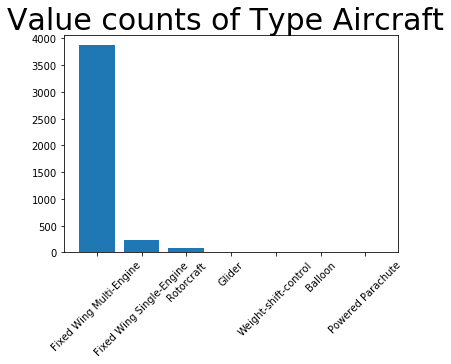

In [3]:
col = 'Type Aircraft'


testfreq = list(test[col].value_counts())
testlen = len(testfreq)
testtype = list(test[col].value_counts().keys())

plt.bar(range(testlen), testfreq);
plt.xticks(range(testlen),testtype, rotation=45);
plt.suptitle('Value counts of '+col, fontsize=30);

In [4]:
def plot_counts( df, col ):
    testfreq = list(df[col].value_counts())
    testlen = len(testfreq)
    testtype = list(df[col].value_counts().keys())
    print(dict(zip(testtype, testfreq)))
    ax = sns.catplot(y=col, kind='count', data=df)
    plt.show()
    return

{'Fixed Wing Multi-Engine': 3866, 'Fixed Wing Single-Engine': 235, 'Rotorcraft': 81, 'Glider': 11, 'Weight-shift-control': 3, 'Balloon': 2, 'Powered Parachute': 1}


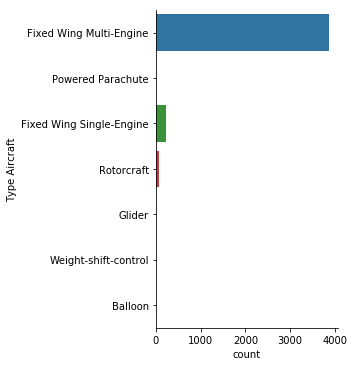

In [5]:
plot_counts(test, 'Type Aircraft')

In [6]:
def want_a_balloon( col ):
    return (test.loc[test['Type Aircraft'] == 'Balloon', col ].value_counts())

In [11]:
want_a_balloon('Manufacturer name')

ZING AEROSPORTS LLC    1
CASSIDY RONALD         1
Name: Manufacturer name, dtype: int64

In [13]:
def Explore_stuff( col1, val1, col2 ):
    return (test.loc[test[col1] == val1, col2 ].value_counts())

In [14]:
Explore_stuff('Airworthiness Classification', 'Experimental', 'Type Aircraft')

Fixed Wing Single-Engine    58
Fixed Wing Multi-Engine     30
Rotorcraft                   5
Glider                       4
Balloon                      2
Weight-shift-control         1
Powered Parachute            1
Name: Type Aircraft, dtype: int64

In [30]:
list(test.columns)

['Tail Number',
 'Serial Number',
 'Manufacturer name',
 'Model',
 'Type Aircraft',
 'Pending Number Change',
 'Date Change Authorized',
 'MFR Year',
 'Type Registration',
 'Certificate Issue Date',
 'Expiration Date',
 'Type Engine',
 'Dealer',
 'Mode S Code (base 8)',
 'Fractional Owner',
 'Engine Manufacturer',
 'Engine Model',
 'A/W Date',
 'Airworthiness Classification',
 'Airworthiness Category',
 'Exception Code']

In [43]:
test_used = test.drop([
    'Tail Number', 'Serial Number', 'Manufacturer name', 
    'Pending Number Change', 'Date Change Authorized', 'Expiration Date',
    'MFR Year', 'Certificate Issue Date', 'Dealer',
    'Mode S Code (base 8)', 'Fractional Owner','Engine Model',
    'A/W Date','Exception Code' 
                      ], axis=1)

In [44]:
test_used.head(n=1)

,Model,Type Aircraft,Type Registration,Type Engine,Engine Manufacturer,Airworthiness Classification,Airworthiness Category
0,737-7Q8,Fixed Wing Multi-Engine,Corporation,Turbo-fan,CFM INTL,Standard,Transport


In [2]:
mfr_model_c = basicClassifier(
    '/Users/brennandonnell/grad_school/data900/Untitled Folder/full_tail_number_list copy.txt',
    'comment\tcomment\tcomment\tclass\tattr\tcomment\tcomment\tcomment\tattr\tcomment\tcomment\tattr\tcomment\tcomment\tcomment\tattr\tcomment\tcomment\tattr\tattr\tcomment'
)

mfr_name_c = basicClassifier(
    '/Users/brennandonnell/grad_school/data900/Untitled Folder/full_tail_number_list copy.txt',
    'comment\tcomment\tclass\tcomment\tattr\tcomment\tcomment\tcomment\tattr\tcomment\tcomment\tattr\tcomment\tcomment\tcomment\tattr\tcomment\tcomment\tattr\tattr\tcomment'
)

In [3]:
mfr_model_c.conditional

{'Model': {1: {'Type Aircraft': 1.0},
  2: {'Type Registration': 1.0},
  3: {'Type Engine': 1.0},
  4: {'Engine Manufacturer': 1.0},
  5: {'Airworthiness Classification': 1.0},
  6: {'Airworthiness Category': 1.0}},
 '737-7Q8': {1: {'Fixed Wing Multi-Engine': 1.0},
  2: {'Corporation': 1.0},
  3: {'Turbo-fan': 1.0},
  4: {'CFM INTL': 0.6666666666666666, 'Unknown': 0.3333333333333333},
  5: {'Standard': 0.6666666666666666, 'Unknown': 0.3333333333333333},
  6: {'Transport': 0.6666666666666666, 'None': 0.3333333333333333}},
 'DA 42': {1: {'Fixed Wing Multi-Engine': 1.0},
  2: {'Corporation': 1.0},
  3: {'Reciprocating': 1.0},
  4: {'THIELERT': 1.0},
  5: {'Standard': 1.0},
  6: {'Normal': 1.0}},
 '767-232': {1: {'Fixed Wing Multi-Engine': 1.0},
  2: {'Corporation': 1.0},
  3: {'Turbo-fan': 1.0},
  4: {'GE': 1.0},
  5: {'Experimental': 1.0},
  6: {'Exhibition': 1.0}},
 'A320-214': {1: {'Fixed Wing Multi-Engine': 1.0},
  2: {'Corporation': 1.0},
  3: {'Turbo-fan': 1.0},
  4: {'CFM INTL.': 0

In [4]:
mfr_model_c.classify([
    'Fixed Wing Single-Engine', 'Private', 'Turbo-jet', 'IAE', 'Stadnard',
    'Transport'
])

'ZR-70'

In [5]:
mfr_name_c.classify([
    'Fixed Wing Multi-Engine', 'Individual', 'Turbo-jet', 'Unknown', 'Unknown',
    'None'
])

'ZING AEROSPORTS LLC'